In [1]:
# import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import warnings for ignore warnings
import warnings
warnings.filterwarnings("ignore")  

In [3]:
# import dataset
df = pd.read_csv('train-chennai-sale.csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
# check shape of dataframe
df.shape

(7109, 22)

In [5]:
# drop unnecessary columns 
df = df.drop('PRT_ID',axis = 1)

In [6]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


# Data Cleaning

In [7]:
# check null values
df.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [8]:
# drop null values
df.dropna(inplace=True)

In [9]:
# check null values again after drop
df.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [10]:
# check duplicate values
df.duplicated().sum()

0

**We Cleaned Null Values And We Haven't Any Duplicate Values**

In [11]:
# check data types of data
df.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

# Change Data Type Of Some Columns

In [12]:
# no of bedrooms
df['N_BEDROOM'] = df['N_BEDROOM'].astype(int)

In [13]:
# no of bathrooms
df['N_BATHROOM'] = df['N_BATHROOM'].astype(int)

**Change Data Type Of Sale Date Column**

In [14]:
# change date format string to datetime
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'])

**Change Data Type Of Build Date Column**

In [15]:
# change date format string to datetime
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'])

In [16]:
# check data type after changing
df.dtypes

AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int32
N_BATHROOM                int32
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
dtype: object

# Wrong Data Handling

**Handle Wrong Data In Area Column**

In [17]:
# check unique values in area column
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [18]:
# replace wrong data with actual data
df['AREA'] = df['AREA'].replace('Adyr','Adyar')
df['AREA'] = df['AREA'].replace(['Chrompt','Chrmpet','Chormpet'],'Chrompet')
df['AREA'] = df['AREA'].replace('Karapakam','Karapakkam')
df['AREA'] = df['AREA'].replace('KKNagar','KK Nagar')
df['AREA'] = df['AREA'].replace('Ann Nagar','Anna Nagar')
df['AREA'] = df['AREA'].replace(['Ann Nagar','Ana Nagar'],'Anna Nagar')
df['AREA'] = df['AREA'].replace('TNagar','T Nagar')
df['AREA'] = df['AREA'].replace('Velchery','Velachery')

In [19]:
# check unique values in area column after replacing
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

**Handle Wrong Data In Sale Condition Column**

In [20]:
# check unique values in sale condition column
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [21]:
# replace wrong data with actual data
df['SALE_COND'] = df['SALE_COND'].replace('Adj Land','AdjLand')
df['SALE_COND'] = df['SALE_COND'].replace(['Partiall','PartiaLl'],'Partial')
df['SALE_COND'] = df['SALE_COND'].replace('Ab Normal','AbNormal')

In [22]:
# check unique values in sale condition column after replacing
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

**Handle Wrong Data In Park Facility Column**

In [23]:
# check unique values in park facility column
df['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [24]:
# replace wrong data with actual data
df['PARK_FACIL'] = df['PARK_FACIL'].replace('Noo','No')

In [25]:
# check unique values in park facility column after replacing
df['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

**Handle Wrong Data In Build Type Column**

In [26]:
# check unique values in build type column
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [27]:
df['BUILDTYPE'] = df['BUILDTYPE'].replace('Comercial','Commercial')
df['BUILDTYPE'] = df['BUILDTYPE'].replace('Other','Others')

In [28]:
# check unique values in build type column after replacing
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

**Handle Wrong Data In Utility Available Column**

In [29]:
# check unique values in utility aviliable column
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [30]:
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace('All Pub', 'AllPub')

In [31]:
# check unique values in utility aviliable column after replacing
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa'], dtype=object)

**Handle Wrong Data In Street Column**

In [32]:
# check unique values in street column
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [33]:
df['STREET'] = df['STREET'].replace('Pavd','Paved')
df['STREET'] = df['STREET'].replace('NoAccess','No Access')

In [34]:
# check unique values in street column after replacing
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

**Handle Wrong Data In Mzzone Column**

In [35]:
# check unique values in mzzone column
df['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

Threre are no wrong values in mzzone column

**Change Data Type Of Sale Date Column**

In [36]:
# change date format string to datetime
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'])

**Change Data Type Of Build Date Column**

In [37]:
# change date format string to datetime
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'])

# Handle Outliers

In [38]:
# find outliers with describe function
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7.056000e+03
mean,1381.316752,99.569161,1.636621,1.213152,3.686650,3.517177,3.505896,3.485332,3.503389,376791.852608,140994.273384,1.088801e+07
std,457.860850,57.403870,0.803633,0.409563,1.020011,0.892141,0.897644,0.886814,0.527313,143109.581793,78774.465963,3.769081e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,991.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272117.500000,84212.750000,8.266790e+06
50%,1369.500000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349444.500000,127640.500000,1.031922e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451030.500000,184449.000000,1.298148e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


**We Can See There Are Some Outliers In Few Columns, So For Better Understanding We Will Use Visualization**

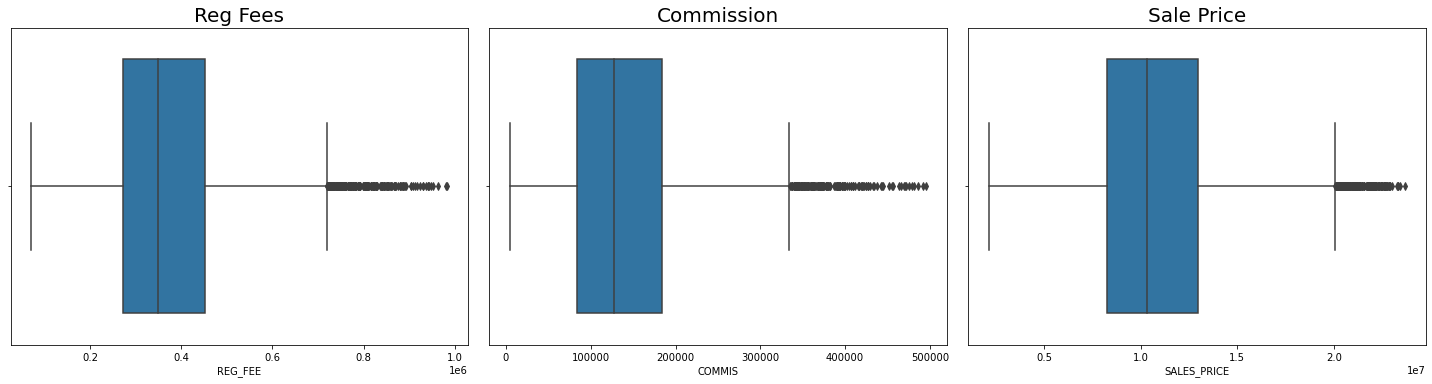

In [39]:
# find outliers by boxplot
plt.figure(figsize = (20,10))

# for reg fees column
plt.subplot(2,3,1)
sns.boxplot(df['REG_FEE'])
plt.title('Reg Fees',fontsize = 20)

# for commis column
plt.subplot(2,3,2)
sns.boxplot(df['COMMIS'])
plt.title('Commission',fontsize = 20)

# for sales price column
plt.subplot(2,3,3)
sns.boxplot(df['SALES_PRICE'])
plt.title('Sale Price', fontsize = 20)

plt.tight_layout()
plt.show()

**We Can See There Are Some Outliers, But For Conformation We Will Apply Some Approach**

# Find Upper And Lower Limit 

In [40]:
# capping of outliers in reg fees column
q1 = df['REG_FEE'].quantile(0.25)
q3 = df['REG_FEE'].quantile(0.75)
iqr = q3-q1
r_lower_limit = q1 - 1.5 * iqr
r_upper_limit = q3 + 1.5 * iqr
print('Reg Fees:\n', 'Lower Limit:', r_lower_limit, '\n', 'Upper Limit:', r_upper_limit, '\n')

# capping of outliers in commission column
q1 = df['COMMIS'].quantile(0.25)
q3 = df['COMMIS'].quantile(0.75)
iqr = q3-q1
c_lower_limit = q1 - 1.5 * iqr
c_upper_limit = q3 + 1.5 * iqr
print('Commision:\n', 'Lower Limit:', c_lower_limit, '\n', 'Upper Limit:', c_upper_limit, '\n')

# capping of outliers in sales price column
q1 = df['SALES_PRICE'].quantile(0.25)
q3 = df['SALES_PRICE'].quantile(0.75)
iqr = q3-q1
s_lower_limit = q1 - 1.5 * iqr
s_upper_limit = q3 + 1.5 * iqr
print('Sales price:\n', 'Lower Limit:', s_lower_limit, '\n', 'Upper Limit:', s_upper_limit, '\n')

Reg Fees:
 Lower Limit: 3748.0 
 Upper Limit: 719400.0 

Commision:
 Lower Limit: -66141.625 
 Upper Limit: 334803.375 

Sales price:
 Lower Limit: 1194758.75 
 Upper Limit: 20053508.75 



# **Check How Many Data Are Higher Than The Upper Limit** 

In [41]:
out = df[(df['REG_FEE']>r_upper_limit) | (df['SALES_PRICE']>s_upper_limit) | (df['COMMIS']>c_upper_limit)]
out.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
19,Anna Nagar,1902,2012-02-07,168,2,1,5,Family,Yes,1970-07-13,...,ELO,Paved,RL,4.5,4.9,4.9,4.760,742113,212032,21203240
44,KK Nagar,2492,2009-06-12,113,4,2,6,AbNormal,No,1993-10-12,...,NoSeWa,Paved,RL,4.3,4.6,3.8,4.190,917550,224706,18725520
47,Anna Nagar,1710,2009-12-11,15,1,1,4,Normal Sale,Yes,1998-11-15,...,AllPub,Gravel,RH,2.7,4.0,2.2,2.825,808639,161728,20215970
53,KK Nagar,1926,2008-12-08,49,3,2,5,Family,Yes,1999-08-15,...,NoSeWa,Paved,RM,3.1,2.9,4.7,3.680,816325,153061,17006780


In [42]:
out.shape

(418, 21)

In [43]:
out[out['INT_SQFT']>1744].shape

(343, 21)

**Important Points:-**
1. We found only 418 rows where the data is higher than the upper limit
2. We can see out of 418 data, 343 has int sqft is higher than 75 percentile
3. Total room size is also greater than 3
4. More the features, more the price

**So We Can't Consider It To Be An Outlier**

# Exploratory Data Analysis

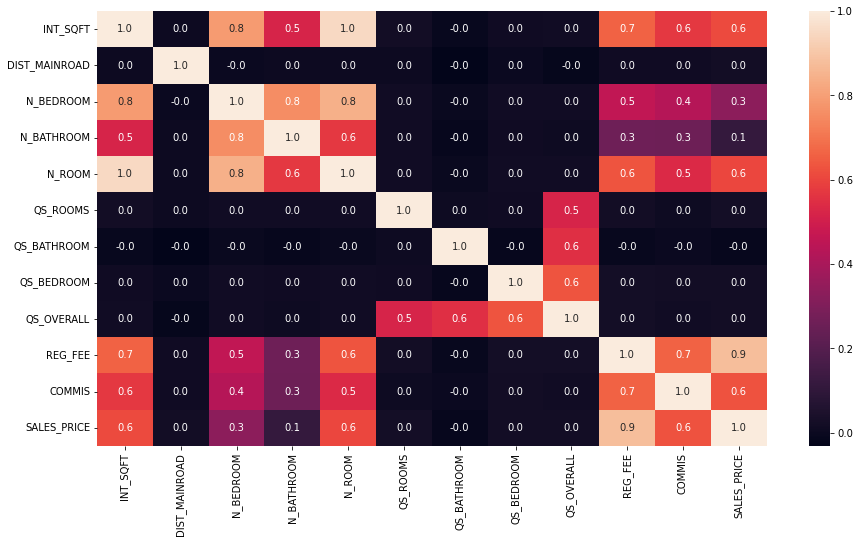

In [44]:
# check linear relationship between data by heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True, fmt='.1f')
plt.show()

# **Visualize Feature Distribution**

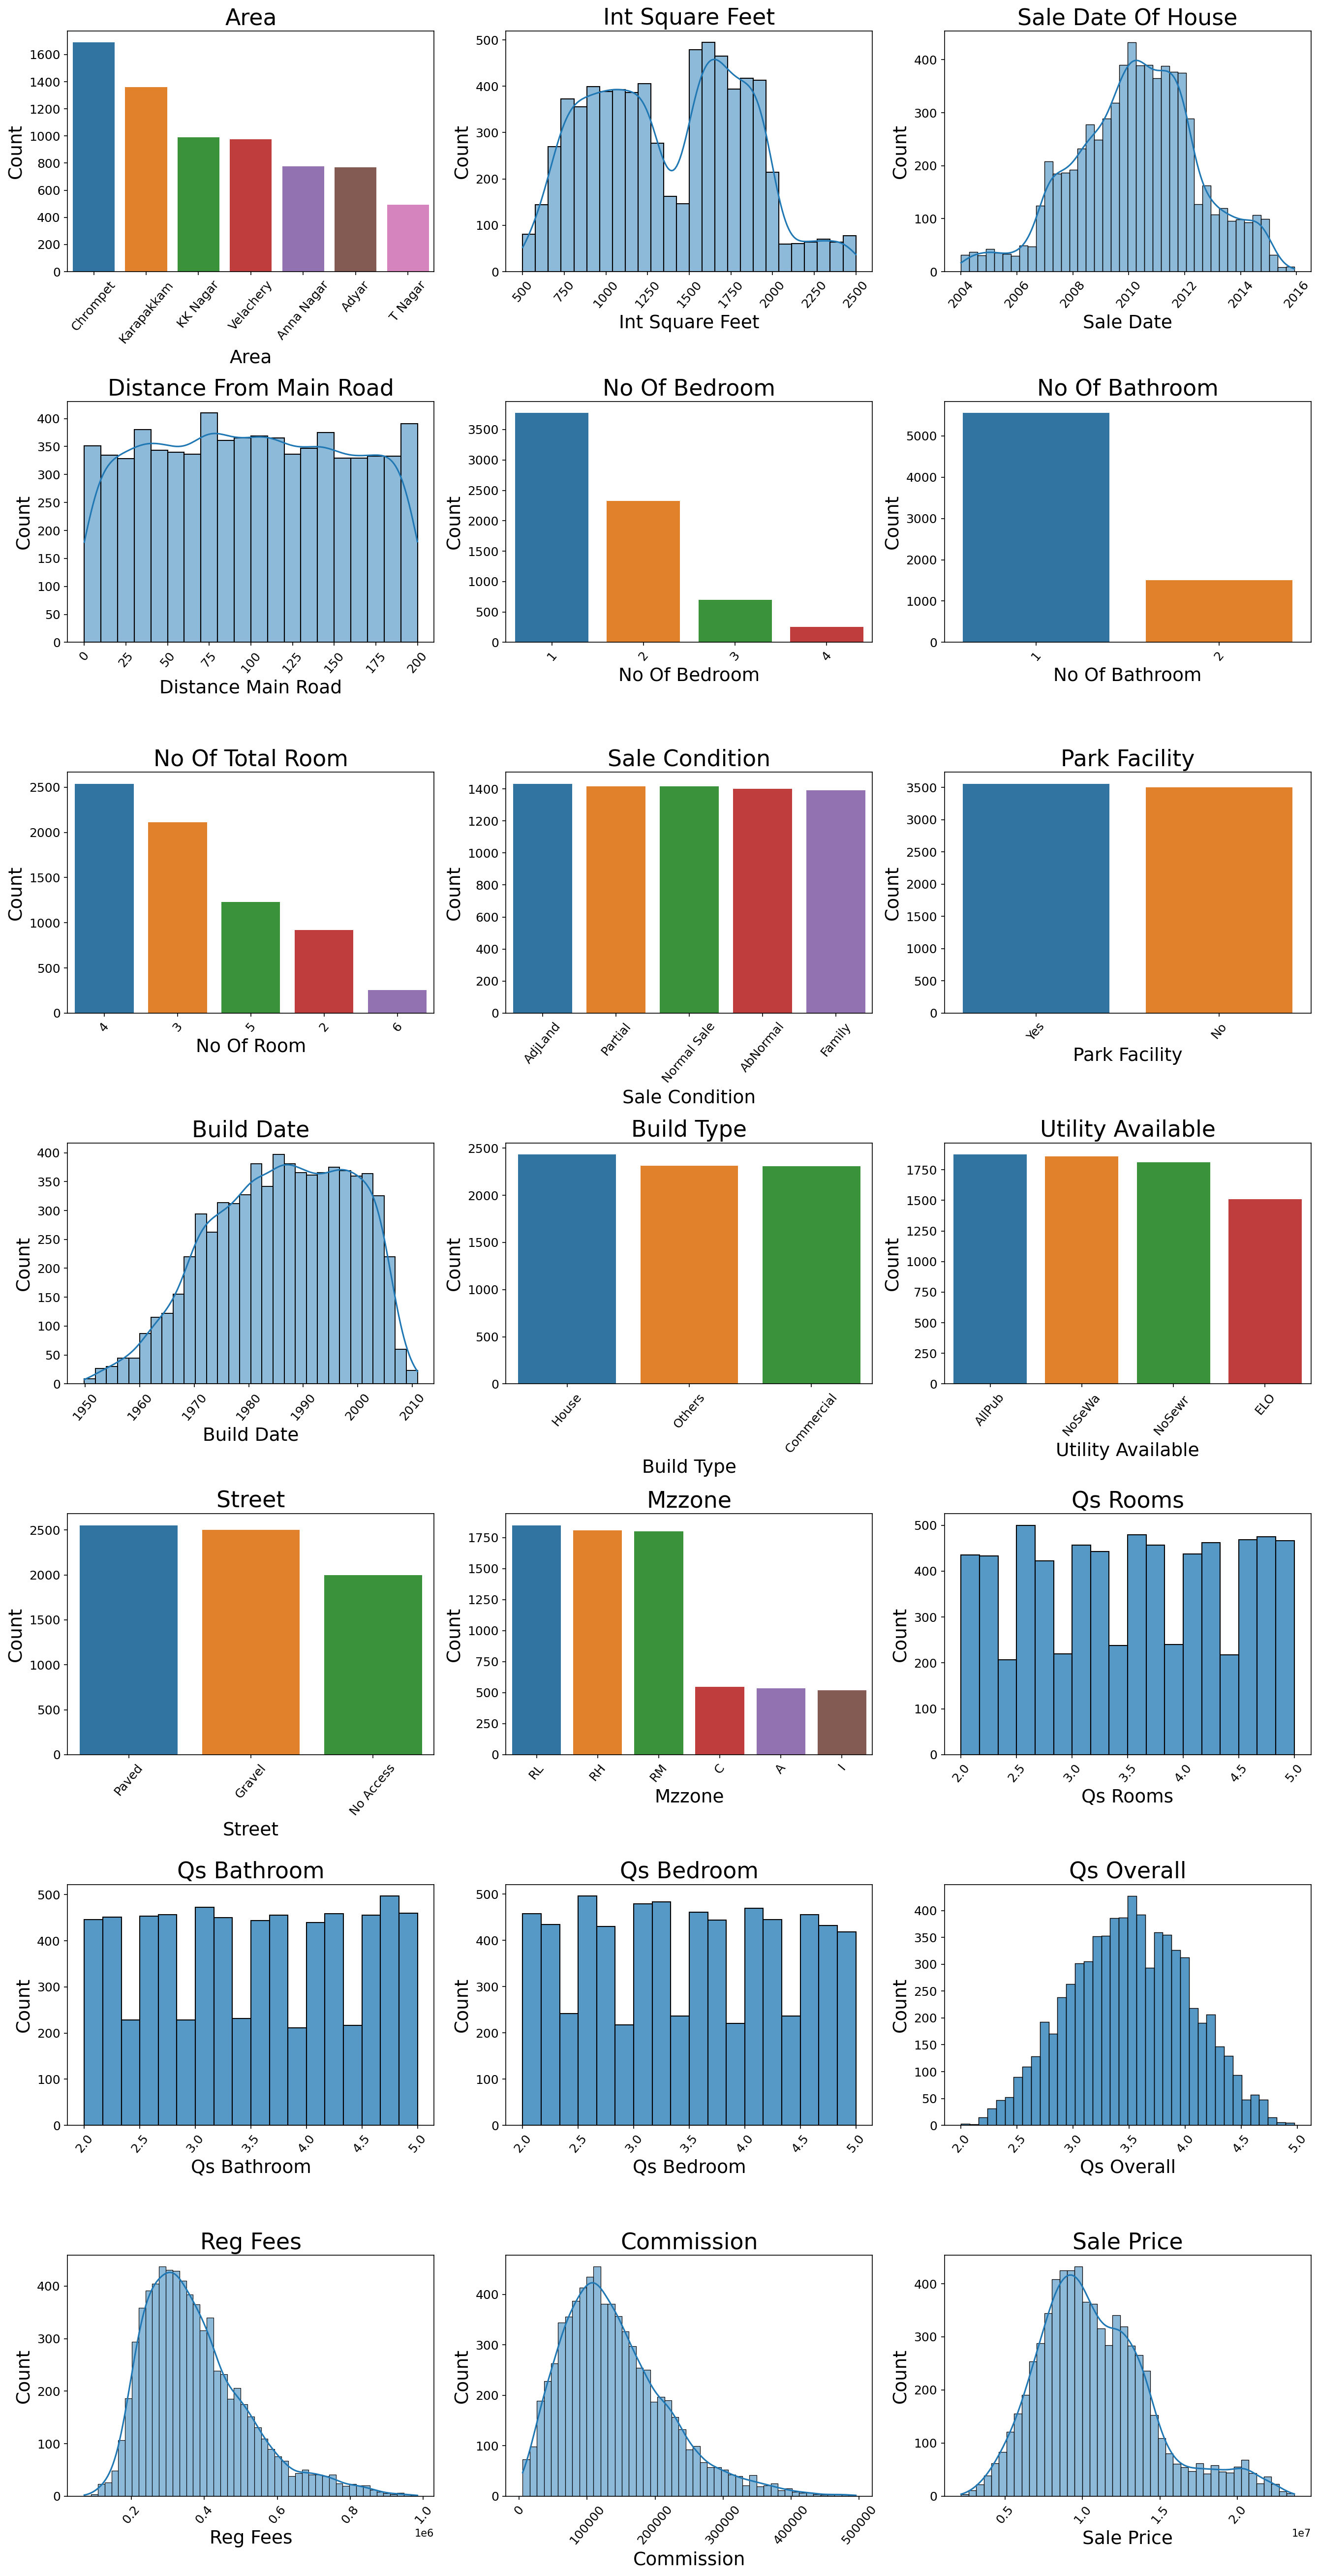

In [45]:
plt.figure(figsize = (18,35),dpi = 150)
# Area
plt.subplot(7,3,1)
sns.countplot(df['AREA'],order = df['AREA'].value_counts().index)
plt.title('Area',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Area',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# int square feet
plt.subplot(7,3,2)
sns.histplot(df['INT_SQFT'],kde = True)
plt.title('Int Square Feet',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Int Square Feet',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# sale date
plt.subplot(7,3,3)
sns.histplot(df['DATE_SALE'],kde = True)
plt.title('Sale Date Of House',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Sale Date',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# dist main road
plt.subplot(7,3,4)
sns.histplot(df['DIST_MAINROAD'],kde = True)
plt.title('Distance From Main Road',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Distance Main Road',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# n bedroom
plt.subplot(7,3,5)
sns.countplot(df['N_BEDROOM'],order = df['N_BEDROOM'].value_counts().index)
plt.title('No Of Bedroom',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('No Of Bedroom',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# n bathroom
plt.subplot(7,3,6)
sns.countplot(df['N_BATHROOM'],order = df['N_BATHROOM'].value_counts().index)
plt.title('No Of Bathroom',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('No Of Bathroom',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# n room
plt.subplot(7,3,7)
sns.countplot(df['N_ROOM'],order = df['N_ROOM'].value_counts().index)
plt.title('No Of Total Room',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('No Of Room',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# sale condition
plt.subplot(7,3,8)
sns.countplot(df['SALE_COND'],order = df['SALE_COND'].value_counts().index)
plt.title('Sale Condition',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Sale Condition',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# park facility
plt.subplot(7,3,9)
sns.countplot(df['PARK_FACIL'],order = df['PARK_FACIL'].value_counts().index)
plt.title('Park Facility',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Park Facility',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Build date
plt.subplot(7,3,10)
sns.histplot(df['DATE_BUILD'],kde = True)
plt.title('Build Date',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Build Date',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Build type
plt.subplot(7,3,11)
sns.countplot(df['BUILDTYPE'],order = df['BUILDTYPE'].value_counts().index)
plt.title('Build Type',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Build Type',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# utility available
plt.subplot(7,3,12)
sns.countplot(df['UTILITY_AVAIL'],order = df['UTILITY_AVAIL'].value_counts().index)
plt.title('Utility Available',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Utility Available',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Street
plt.subplot(7,3,13)
sns.countplot(df['STREET'],order = df['STREET'].value_counts().index)
plt.title('Street',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Street',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Mzzone
plt.subplot(7,3,14)
sns.countplot(df['MZZONE'],order = df['MZZONE'].value_counts().index)
plt.title('Mzzone',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Mzzone',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Qs rooms
plt.subplot(7,3,15)
sns.histplot(df['QS_ROOMS'])
plt.title('Qs Rooms',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Qs Rooms',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Qs bathrooms
plt.subplot(7,3,16)
sns.histplot(df['QS_BATHROOM'])
plt.title('Qs Bathroom',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Qs Bathroom',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Qs bedrooms
plt.subplot(7,3,17)
sns.histplot(df['QS_BEDROOM'])
plt.title('Qs Bedroom',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Qs Bedroom',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Qs overall
plt.subplot(7,3,18)
sns.histplot(df['QS_OVERALL'])
plt.title('Qs Overall',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Qs Overall',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Reg fees
plt.subplot(7,3,19)
sns.histplot(df['REG_FEE'],kde = True)
plt.title('Reg Fees',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Reg Fees',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Commission
plt.subplot(7,3,20)
sns.histplot(df['COMMIS'],kde = True)
plt.title('Commission',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Commission',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Sale Price
plt.subplot(7,3,21)
sns.histplot(df['SALES_PRICE'],kde = True)
plt.title('Sale Price',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Sale Price',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

plt.tight_layout()
plt.show()

**INTERPRETATION:-**
1. Area
    * Based on dataset, Chrompet area house sold the most and then Karapakkam and then others
    * T Nagar house sold the least
2. Int Sqft
    * The count of the house with the int sqft betwee 1500 - 1700 is highest
    * Most of the data in the Int Sqft column is in the range of 500 - 1200
    * Int Sqft column is not following the Gaussian/Normal Distribution
3. Sale Date
    * Most of the house sold between 2010 - 2012
    * Very few house sold between 2004 - 2007
    * Sale Date column following the Gaussian/Normal Distribution
4. Distance From Main Road
    * There are more than 400 houses whose distance from the main road is is between 70 - 80 meters
    * There are more than 350 houses whose distance from the main road is is between 190 - 200 meters
5. No Of Bedroom
    * Most of the houses have only 1 bedroom
    * House with 2 bedrooms comes in the second position
    * There are only a few houses with 4 bedrooms
6. No Of Bathroom
    * Most of the houses come with only 1 bathroom and count of houses with 2 bathroom is very less
7. No Of Total Rooms
    * The number of houses with 4 rooms is most and then 3
    * The number of houses with 6 rooms is very less 
8. Sale Condition
    * The distribution of sale conditions is approximately equal
9. Park Facility
    * The distribution of park facility is approximately equal
10. Build Date
    * Most of the houses were built between 1970 - 2004
    * Very few homes were built before 1960 and after 2005
11. Built Type
    * The distribution of built type is approximately equal
12. Utility Available
    * The distribution of utility available is approximately equal except elo utility
    * The number of elo utility is very less than the others
13. Street
    * The number of paved and gravel street is approximately equal and the no-access street is lesser
14. Mzzone
    * The number of mzzone (RL, RH, RM) is approximately equal and (C, A, I) is also approximately equal
    * The distribution of (RL, RH, RM) is higher than (A, C, I)
15. Qs Rooms
    * The distribution of qs rooms is approximately equal
16. Qs Bathooms
    * The distribution of qs bathrooms is approximately equal
17. Qs Bedrooms
    * The distribution of qs bedrooms is approximately equal
18. Qs Rooms
    * Qs rooms following the Gaussian/Normal Distribution
19. Reg Fees
    * Reg fees is not following the Gaussian/Normal Distribution and skewed on left side
    * Based on the dataset most people paid 2 - 4 lakhs for house registration
    * For registration of very few houses, people had to pay more than 6 lakhs
20. Commission
    * Commission is not following the Gaussian/Normal Distribution and skewed on left side
    * Based on the dataset most people gave 60k - 1.5 lakhs for commission
    * For very few houses, people paid 25 lakhs for commission
21. Sales Price
    * Most of the houses sold in the price range of 7 lakh - 1.3 crore
    * Very few houses sold above the 1.5 crore price limit

# **Features Vs Features**

**Area Vs All Features**

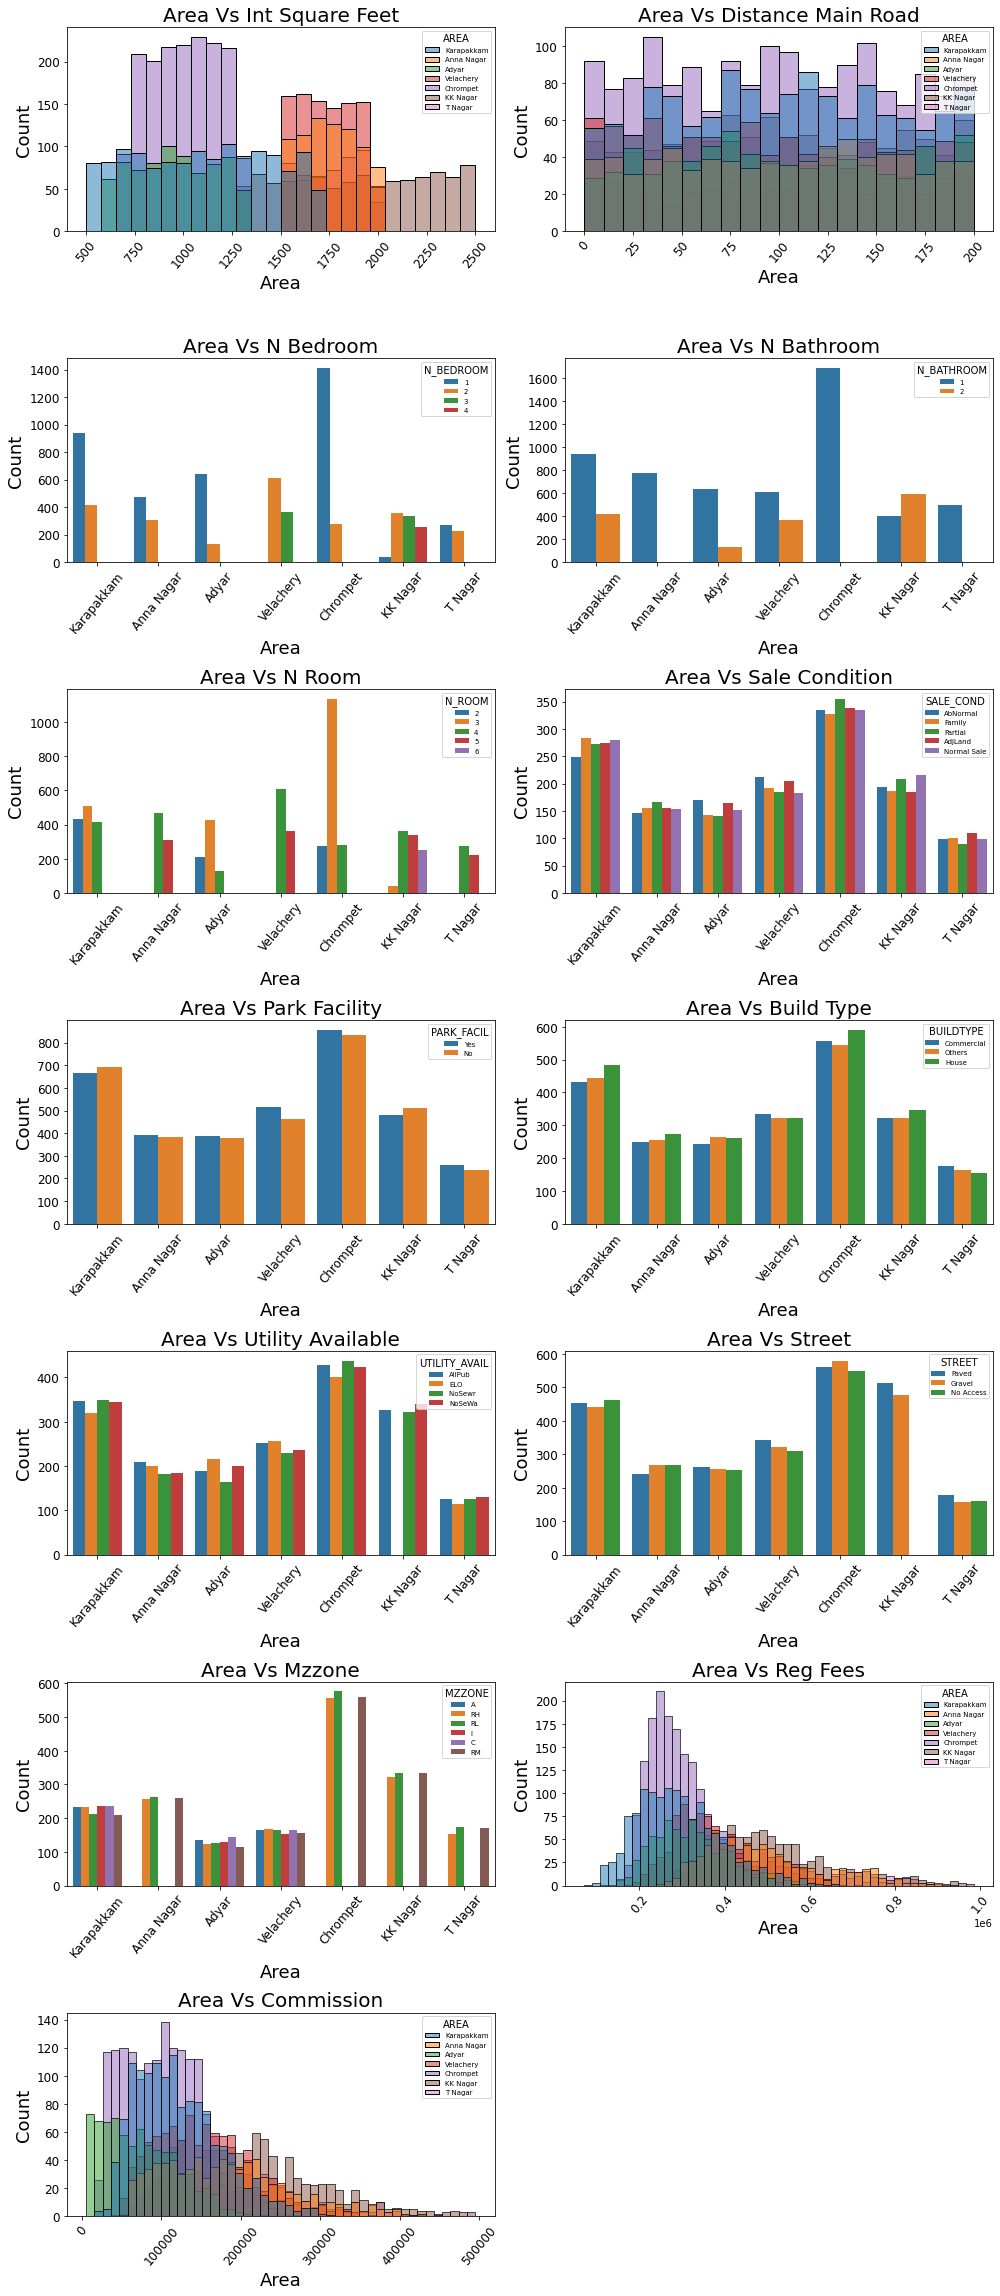

In [46]:
plt.figure(figsize = (14,32))

# Area vs square feet
plt.subplot(7,2,1)
ax = sns.histplot(x = df.INT_SQFT, hue = df.AREA )
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Area Vs Int Square Feet',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Area',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Area vs distance main road
plt.subplot(7,2,2)
ax = sns.histplot(x = df.DIST_MAINROAD, hue = df.AREA )
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Area Vs Distance Main Road',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Area',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Area vs bedroom
plt.subplot(7,2,3)
ax = sns.countplot(df.AREA,hue = df.N_BEDROOM )
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Area Vs N Bedroom',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Area',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Area vs bathroom
plt.subplot(7,2,4)
ax = sns.countplot(df.AREA,hue = df.N_BATHROOM )
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Area Vs N Bathroom',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Area',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Area vs room
plt.subplot(7,2,5)
ax = sns.countplot(df.AREA,hue = df.N_ROOM )
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Area Vs N Room',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Area',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Area vs sale condition
plt.subplot(7,2,6)
ax = sns.countplot(df.AREA,hue = df.SALE_COND )
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Area Vs Sale Condition',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Area',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Area vs park facility
plt.subplot(7,2,7)
ax = sns.countplot(df.AREA,hue = df.PARK_FACIL )
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Area Vs Park Facility',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Area',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Area vs build type
plt.subplot(7,2,8)
ax = sns.countplot(df.AREA,hue = df.BUILDTYPE )
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Area Vs Build Type',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Area',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Area vs utility available
plt.subplot(7,2,9)
ax = sns.countplot(df.AREA,hue = df.UTILITY_AVAIL )
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Area Vs Utility Available',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Area',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Area vs street
plt.subplot(7,2,10)
ax = sns.countplot(df.AREA,hue = df.STREET )
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Area Vs Street',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Area',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Area vs mzzone
plt.subplot(7,2,11)
ax = sns.countplot(df.AREA,hue = df.MZZONE )
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Area Vs Mzzone',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Area',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Area vs reg fees
plt.subplot(7,2,12)
ax = sns.histplot(x = df.REG_FEE, hue = df.AREA )
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Area Vs Reg Fees',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Area',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Area vs commission
plt.subplot(7,2,13)
ax = sns.histplot(x = df.COMMIS, hue = df.AREA )
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Area Vs Commission',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Area',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

plt.tight_layout()
plt.show()

**Int Square Feet Vs All Features**

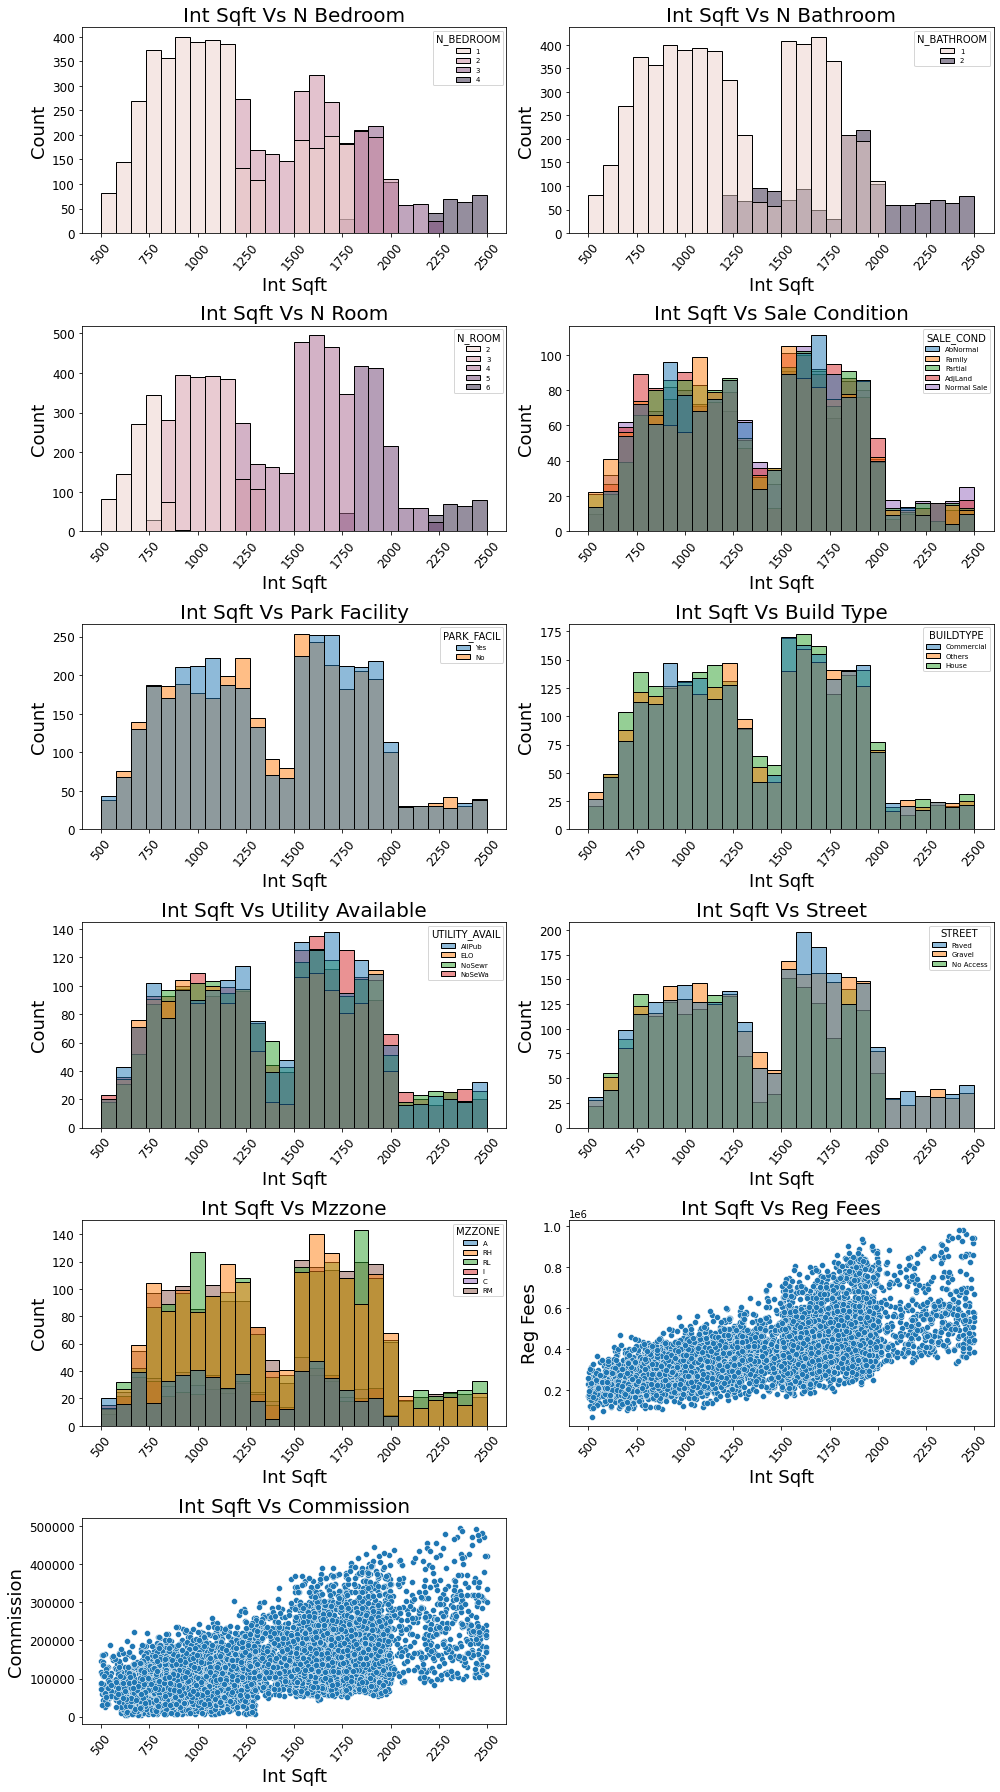

In [47]:
plt.figure(figsize = (14,25))

# Int Sqft vs bedroom
plt.subplot(6,2,1)
ax = sns.histplot(x = df.INT_SQFT, hue = df.N_BEDROOM)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Int Sqft Vs N Bedroom',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Int Sqft',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Int Sqft vs bathroom
plt.subplot(6,2,2)
ax = sns.histplot(x = df.INT_SQFT, hue = df.N_BATHROOM)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Int Sqft Vs N Bathroom',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Int Sqft',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Int Sqft vs room
plt.subplot(6,2,3)
ax = sns.histplot(x = df.INT_SQFT, hue = df.N_ROOM)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Int Sqft Vs N Room',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Int Sqft',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Int Sqft vs sale condition
plt.subplot(6,2,4)
ax = sns.histplot(x = df.INT_SQFT, hue = df.SALE_COND)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Int Sqft Vs Sale Condition',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Int Sqft',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Int Sqft vs park facility
plt.subplot(6,2,5)
ax = sns.histplot(x = df.INT_SQFT, hue = df.PARK_FACIL)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Int Sqft Vs Park Facility',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Int Sqft',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Int Sqft vs build type
plt.subplot(6,2,6)
ax = sns.histplot(x = df.INT_SQFT, hue = df.BUILDTYPE)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Int Sqft Vs Build Type',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Int Sqft',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Int Sqft vs utility available
plt.subplot(6,2,7)
ax = sns.histplot(x = df.INT_SQFT, hue = df.UTILITY_AVAIL)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Int Sqft Vs Utility Available',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Int Sqft',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Int Sqft vs street
plt.subplot(6,2,8)
ax = sns.histplot(x = df.INT_SQFT, hue = df.STREET)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Int Sqft Vs Street',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Int Sqft',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Int Sqft vs mzzone
plt.subplot(6,2,9)
ax = sns.histplot(x = df.INT_SQFT, hue = df.MZZONE)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Int Sqft Vs Mzzone',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Int Sqft',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Int Sqft vs reg fees
plt.subplot(6,2,10)
sns.scatterplot(x = df.INT_SQFT, y = df.REG_FEE)
plt.title('Int Sqft Vs Reg Fees',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Int Sqft',fontsize = 18)
plt.ylabel('Reg Fees',fontsize = 18)

# Int Sqft vs commission
plt.subplot(6,2,11)
sns.scatterplot(x = df.INT_SQFT, y = df.COMMIS)
plt.title('Int Sqft Vs Commission',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Int Sqft',fontsize = 18)
plt.ylabel('Commission',fontsize = 18)

plt.tight_layout()
plt.show()

**Distance From Main Road Vs All Features**

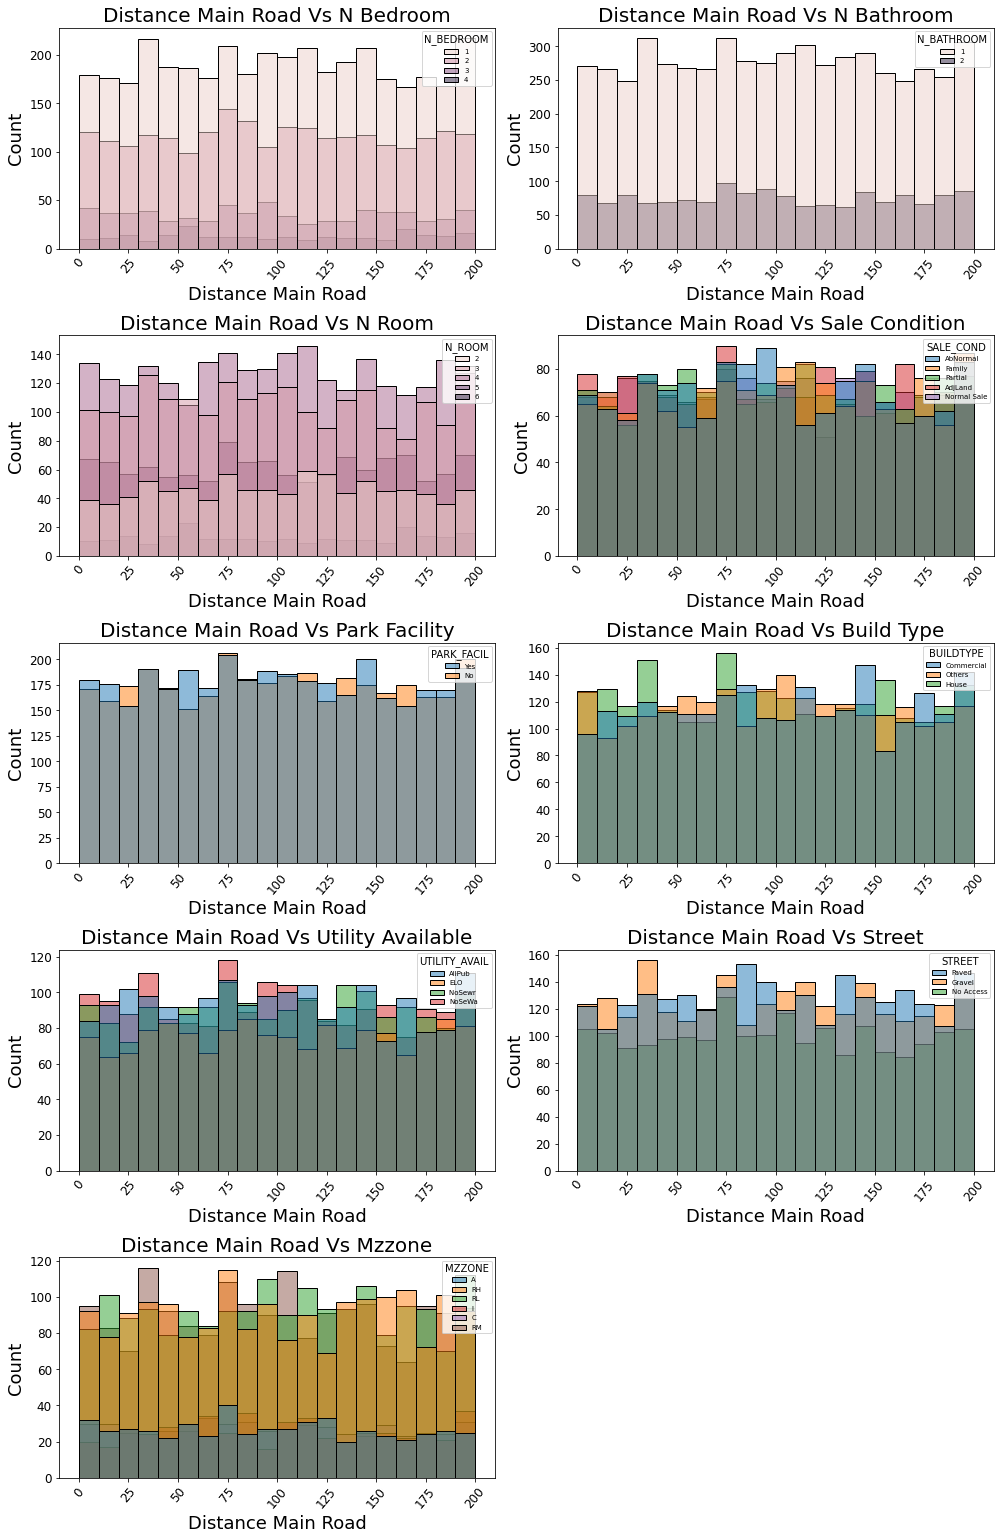

In [48]:
plt.figure(figsize = (14,25))

# Distance Main Road vs bedroom
plt.subplot(6,2,1)
ax = sns.histplot(x = df.DIST_MAINROAD, hue = df.N_BEDROOM)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Distance Main Road Vs N Bedroom',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Distance Main Road',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Distance Main Road vs bathroom
plt.subplot(6,2,2)
ax = sns.histplot(x = df.DIST_MAINROAD, hue = df.N_BATHROOM)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Distance Main Road Vs N Bathroom',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Distance Main Road',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Distance Main Road vs room
plt.subplot(6,2,3)
ax = sns.histplot(x = df.DIST_MAINROAD, hue = df.N_ROOM)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Distance Main Road Vs N Room',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Distance Main Road',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Distance Main Road vs sale condition
plt.subplot(6,2,4)
ax = sns.histplot(x = df.DIST_MAINROAD, hue = df.SALE_COND)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Distance Main Road Vs Sale Condition',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Distance Main Road',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Distance Main Road vs park facility
plt.subplot(6,2,5)
ax = sns.histplot(x = df.DIST_MAINROAD, hue = df.PARK_FACIL)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Distance Main Road Vs Park Facility',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Distance Main Road',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Distance Main Road vs build type
plt.subplot(6,2,6)
ax = sns.histplot(x = df.DIST_MAINROAD, hue = df.BUILDTYPE)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Distance Main Road Vs Build Type',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Distance Main Road',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Distance Main Road vs utility available
plt.subplot(6,2,7)
ax = sns.histplot(x = df.DIST_MAINROAD, hue = df.UTILITY_AVAIL)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Distance Main Road Vs Utility Available',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Distance Main Road',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Distance Main Road vs street
plt.subplot(6,2,8)
ax = sns.histplot(x = df.DIST_MAINROAD, hue = df.STREET)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Distance Main Road Vs Street',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Distance Main Road',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Distance Main Road vs mzzone
plt.subplot(6,2,9)
ax = sns.histplot(x = df.DIST_MAINROAD, hue = df.MZZONE)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Distance Main Road Vs Mzzone',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Distance Main Road',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

plt.tight_layout()
plt.show()

**No Of Bedroom Vs All Features**

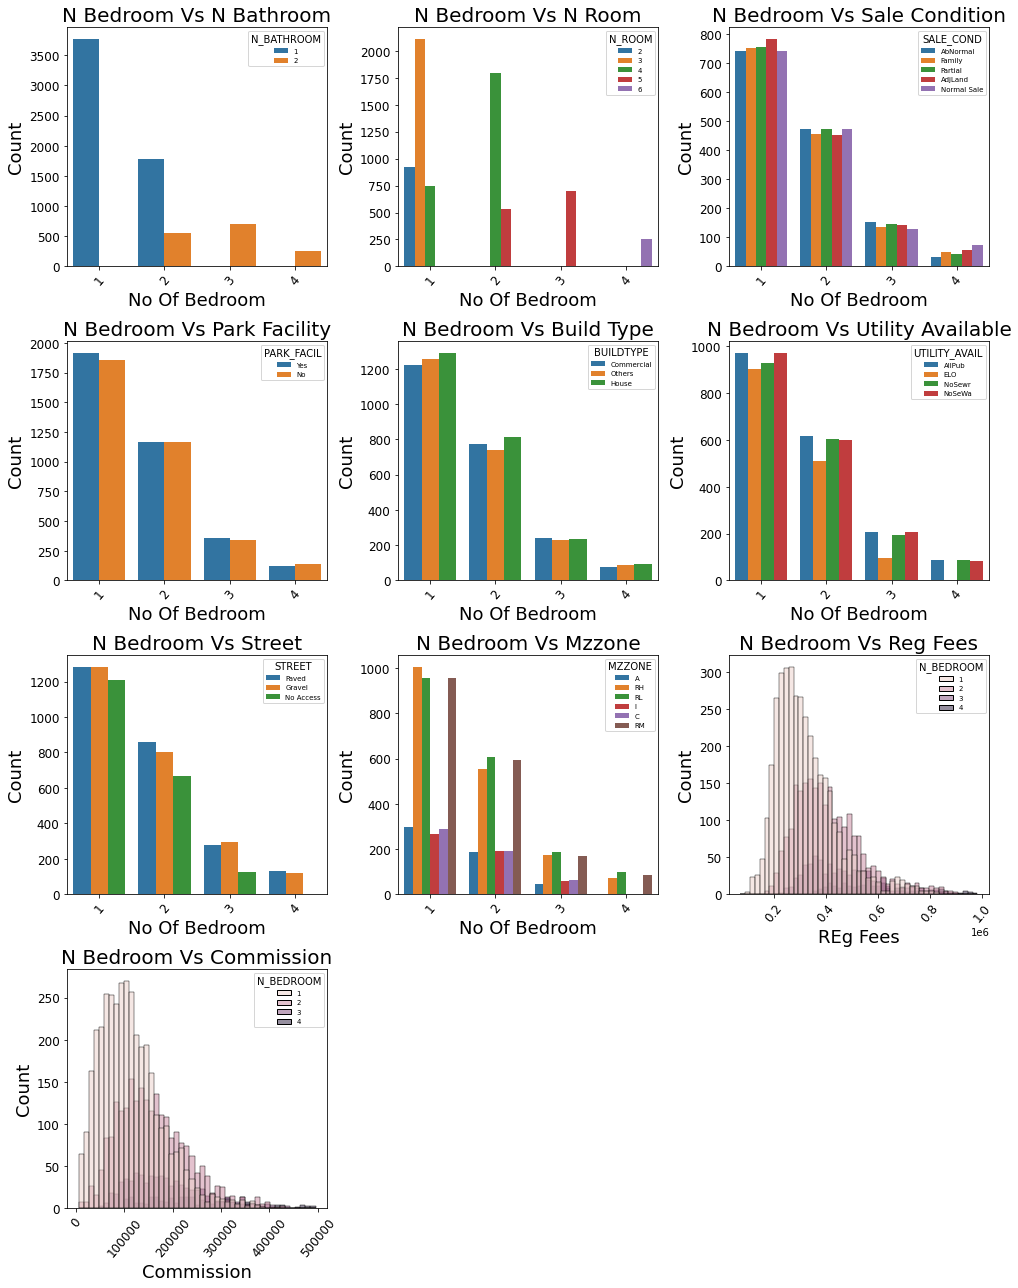

In [49]:
plt.figure(figsize = (14,18))

# No of bedroom vs no of bathroom
plt.subplot(4,3,1)
ax = sns.countplot(x = df['N_BEDROOM'],hue = df['N_BATHROOM'])
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('N Bedroom Vs N Bathroom',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('No Of Bedroom',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# No of bedroom vs no of room
plt.subplot(4,3,2)
ax = sns.countplot(x = df['N_BEDROOM'],hue = df['N_ROOM'])
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('N Bedroom Vs N Room',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('No Of Bedroom',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# No of bedroom vs sale condition
plt.subplot(4,3,3)
ax = sns.countplot(x = df['N_BEDROOM'],hue = df['SALE_COND'])
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('N Bedroom Vs Sale Condition',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('No Of Bedroom',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# No of bedroom vs Park Facility
plt.subplot(4,3,4)
ax = sns.countplot(x = df['N_BEDROOM'],hue = df['PARK_FACIL'])
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('N Bedroom Vs Park Facility',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('No Of Bedroom',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# No of bedroom vs Build Type
plt.subplot(4,3,5)
ax = sns.countplot(x = df['N_BEDROOM'],hue = df['BUILDTYPE'])
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('N Bedroom Vs Build Type',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('No Of Bedroom',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# No of bedroom vs utility available
plt.subplot(4,3,6)
ax = sns.countplot(x = df['N_BEDROOM'],hue = df['UTILITY_AVAIL'])
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('N Bedroom Vs Utility Available',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('No Of Bedroom',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# No of bedroom vs street
plt.subplot(4,3,7)
ax = sns.countplot(x = df['N_BEDROOM'],hue = df['STREET'])
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('N Bedroom Vs Street',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('No Of Bedroom',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# No of bedroom vs mzzone
plt.subplot(4,3,8)
ax = sns.countplot(x = df['N_BEDROOM'],hue = df['MZZONE'])
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('N Bedroom Vs Mzzone',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('No Of Bedroom',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# No of bedroom vs reg fees
plt.subplot(4,3,9)
ax = sns.histplot(x = df['REG_FEE'],hue = df['N_BEDROOM'])
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('N Bedroom Vs Reg Fees',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('REg Fees',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# No of bedroom vs commission
plt.subplot(4,3,10)
ax = sns.histplot(x = df['COMMIS'],hue = df['N_BEDROOM'])
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('N Bedroom Vs Commission',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Commission',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

plt.tight_layout()
plt.show()

**Reg Fees Vs Commission**

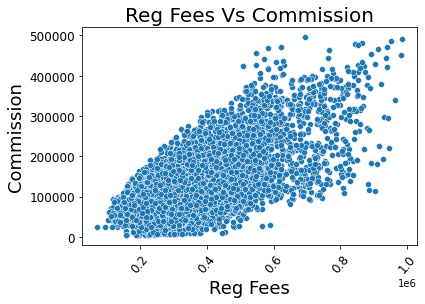

In [50]:
# Reg fees vs commission
sns.scatterplot(df['REG_FEE'], df['COMMIS'])
plt.title('Reg Fees Vs Commission',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Commission',fontsize = 18)
plt.xlabel('Reg Fees',fontsize = 18)

plt.show()

# **Target Vs All Features**

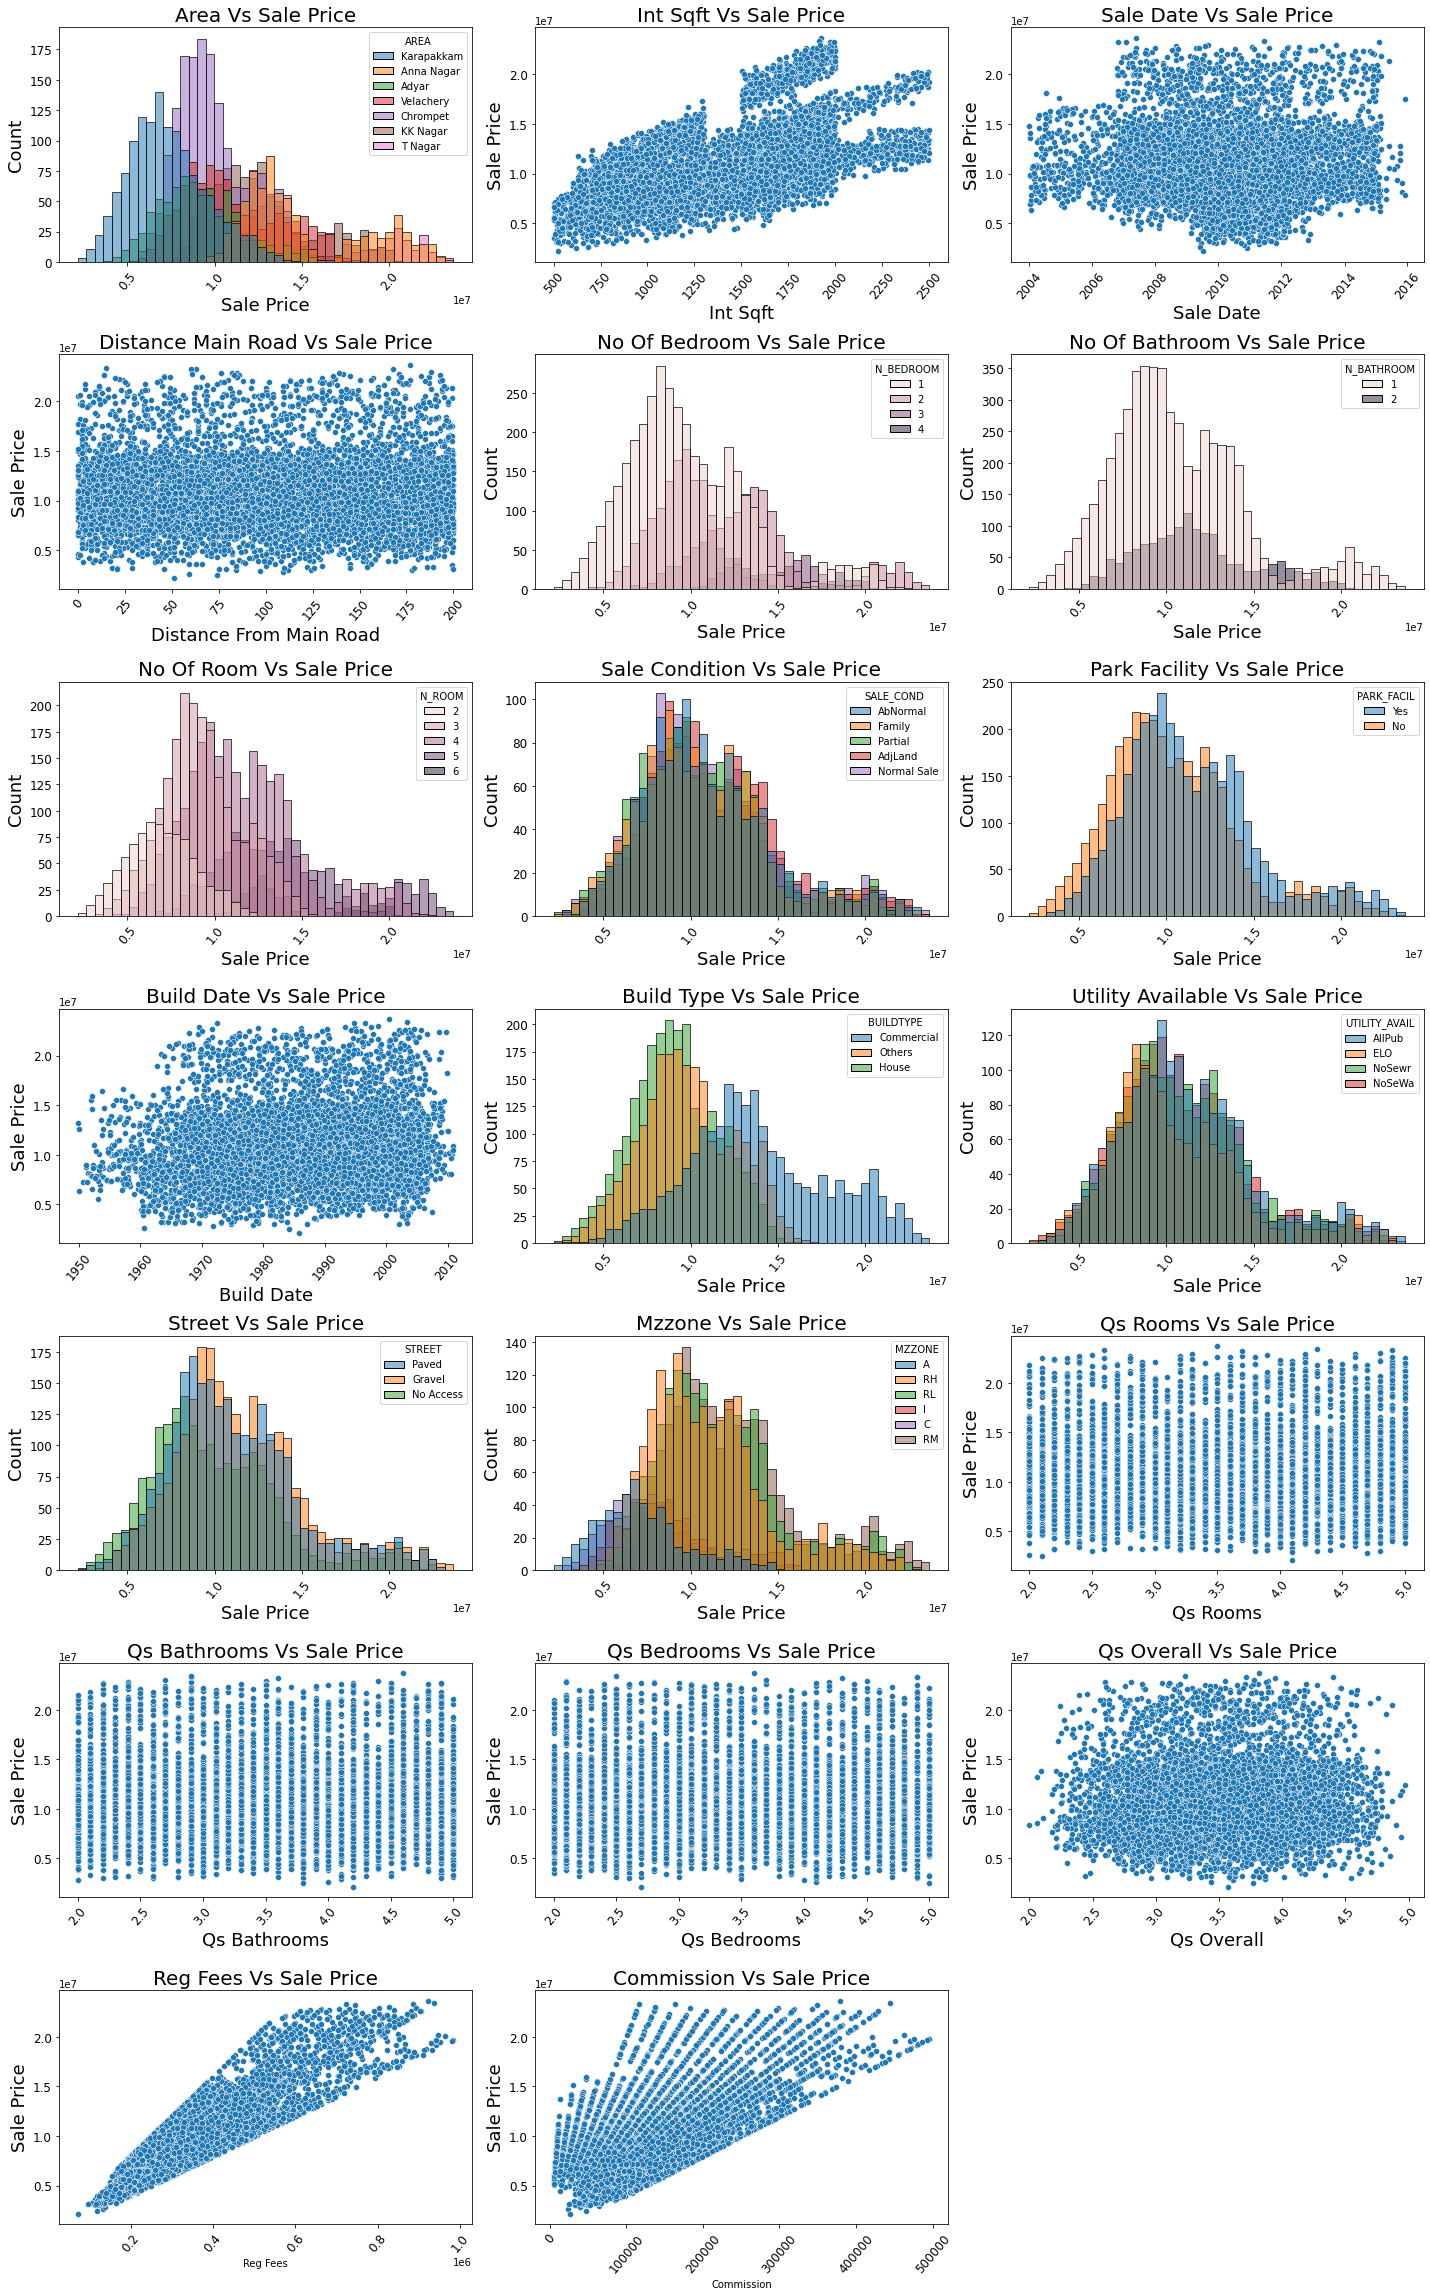

In [51]:
plt.figure(figsize = (20,32))

# Area vs Sale Price
plt.subplot(7,3,1)
sns.histplot(x = df['SALES_PRICE'], hue = df['AREA'])
plt.title('Area Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Sale Price',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Int sqft vs Sale Price
plt.subplot(7,3,2)
sns.scatterplot(df['INT_SQFT'],df['SALES_PRICE'])
plt.title('Int Sqft Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Sale Price',fontsize = 18)
plt.xlabel('Int Sqft',fontsize = 18)

# Sale Date vs Sale Price
plt.subplot(7,3,3)
sns.scatterplot(df['DATE_SALE'],df['SALES_PRICE'])
plt.title('Sale Date Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Sale Price',fontsize = 18)
plt.xlabel('Sale Date',fontsize = 18)

# Distance main road vs Sale Price
plt.subplot(7,3,4)
sns.scatterplot(df['DIST_MAINROAD'],df['SALES_PRICE'])
plt.title('Distance Main Road Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Sale Price',fontsize = 18)
plt.xlabel('Distance From Main Road',fontsize = 18)

# Number of bedroom vs Sale Price
plt.subplot(7,3,5)
sns.histplot(x = df['SALES_PRICE'], hue = df['N_BEDROOM'])
plt.title('No Of Bedroom Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Sale Price',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Number of bathroom vs Sale Price
plt.subplot(7,3,6)
sns.histplot(x = df['SALES_PRICE'], hue = df['N_BATHROOM'])
plt.title('No Of Bathroom Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Sale Price',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Number of total room vs Sale Price
plt.subplot(7,3,7)
sns.histplot(x = df['SALES_PRICE'], hue = df['N_ROOM'])
plt.title('No Of Room Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Sale Price',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Sale condition vs Sale Price
plt.subplot(7,3,8)
sns.histplot(x = df['SALES_PRICE'], hue = df['SALE_COND'])
plt.title('Sale Condition Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Sale Price',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Park facility vs Sale Price
plt.subplot(7,3,9)
sns.histplot(x = df['SALES_PRICE'], hue = df['PARK_FACIL'])
plt.title('Park Facility Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Sale Price',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Build Date vs Sale Price
plt.subplot(7,3,10)
sns.scatterplot(df['DATE_BUILD'],df['SALES_PRICE'])
plt.title('Build Date Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Sale Price',fontsize = 18)
plt.xlabel('Build Date',fontsize = 18)

# Build type vs Sale Price
plt.subplot(7,3,11)
sns.histplot(x = df['SALES_PRICE'], hue = df['BUILDTYPE'])
plt.title('Build Type Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Sale Price',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Utility available vs Sale Price
plt.subplot(7,3,12)
sns.histplot(x = df['SALES_PRICE'], hue = df['UTILITY_AVAIL'])
plt.title('Utility Available Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Sale Price',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Street vs Sale Price
plt.subplot(7,3,13)
sns.histplot(x = df['SALES_PRICE'], hue = df['STREET'])
plt.title('Street Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Sale Price',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Mzzone vs Sale Price
plt.subplot(7,3,14)
sns.histplot(x = df['SALES_PRICE'], hue = df['MZZONE'])
plt.title('Mzzone Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Sale Price',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Qs Rooms vs Sale Price
plt.subplot(7,3,15)
sns.scatterplot(df['QS_ROOMS'],df['SALES_PRICE'])
plt.title('Qs Rooms Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Sale Price',fontsize = 18)
plt.xlabel('Qs Rooms',fontsize = 18)

# Qs Bathrooms vs Sale Price
plt.subplot(7,3,16)
sns.scatterplot(df['QS_BATHROOM'],df['SALES_PRICE'])
plt.title('Qs Bathrooms Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Sale Price',fontsize = 18)
plt.xlabel('Qs Bathrooms',fontsize = 18)

# Qs Bedrooms vs Sale Price
plt.subplot(7,3,17)
sns.scatterplot(df['QS_BEDROOM'],df['SALES_PRICE'])
plt.title('Qs Bedrooms Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Sale Price',fontsize = 18)
plt.xlabel('Qs Bedrooms',fontsize = 18)

# Qs Overall vs Sale Price
plt.subplot(7,3,18)
sns.scatterplot(df['QS_OVERALL'],df['SALES_PRICE'])
plt.title('Qs Overall Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Sale Price',fontsize = 18)
plt.xlabel('Qs Overall',fontsize = 18)

# Reg fees vs Sale Price
plt.subplot(7,3,19)
sns.scatterplot(df['REG_FEE'],df['SALES_PRICE'])
plt.title('Reg Fees Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Sale Price',fontsize = 18)
plt.xlabel('Reg Fees')

# Commission vs Sale Price
plt.subplot(7,3,20)
sns.scatterplot(df['COMMIS'],df['SALES_PRICE'])
plt.title('Commission Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Sale Price',fontsize = 18)
plt.xlabel('Commission')

plt.tight_layout()
plt.show()


**INTERPRETATION:-**
1. Area Vs Sales Price
     * House price in the Karpakkam area is less compared to other area
     * Homes in the Chrompet area sold the most
     * Most expensive homes come in the Velachery area
2. Int Sqft Vs Sales Price     
     * We can see the linear relationship between int sqft and sales price
     * More the int sqft more the sales price
3. Sale Date Vs Sales Price     
     * There is no linear relationship between sale date and sales price
4. Dist Main Road Vs Sales Price     
     * There is no linear relationship between dist main road and sales price
5. No Of Bedroom Vs Sales Price     
     * House with one bed room sold most
     * Very few houses are there with 3/4 bedroom
     * More the bed room more the sales price
6. No Of Bathroom Vs Sales Price     
     * House with one bath room sold most
     * Very few houses are there with 2 bathroom
7. No Of Room Vs Sales Price     
     * House with 3/4 room sold most
     * Very few houses are there with 5/6 room
     * More the room more the sales price
8. Build Date Vs Sales Price     
     * There is no linear relationship between build date and sales price
9. Build Type Vs Sales Price     
     * Build type ouses sales price is less compared to other build type
     * Build type commercial sales price is highest
10. Qs Rooms Vs Sales Price     
     * There is no linear relationship between qs rooms and sales price
11. Qs Bathrooms Vs Sales Price     
     * There is no linear relationship between qs bathrooms and sales price
12. Qs Bedrooms Vs Sales Price     
     * There is no linear relationship between qs bedrooms and sales price
13. Qs Overall Vs Sales Price     
     * There is no linear relationship between qs overall and sales price
14. Reg Fees Vs Sales Price     
     * We can see very good linear relationship between reg fees and sales price
     * More the sales price more the reg fees
15. Commission Vs Sales Price     
     * We can see linear relationship between commission and sales price
     * More the sales price more the commission

In [52]:
# copy of dataframe
df2 = df.copy()

In [53]:
# find house age and assign in new column
df2['HOUSE_AGE'] = df2['DATE_SALE']-df2['DATE_BUILD']
df2['HOUSE_AGE'] = df2['HOUSE_AGE'].astype(str)
df2['HOUSE_AGE'] = df2['HOUSE_AGE'].str.split().str[0]
df2['HOUSE_AGE'] = df2['HOUSE_AGE'].astype(int)
df2['HOUSE_AGE'] = round(df2['HOUSE_AGE']/365,2)

In [54]:
df2.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,HOUSE_AGE
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,43.92
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,11.00
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,19.59
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,22.00
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,29.59


**We have to drop the columns that are not important**

In [55]:
# drop unuseful column
df2.drop(['DATE_SALE','DATE_BUILD','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','REG_FEE', 'COMMIS'],axis = 1, inplace = True)

In [56]:
df2.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,HOUSE_AGE
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,7600000,43.92
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,21717770,11.00
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,13159200,19.59
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,9630290,22.00
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,7406250,29.59


# Data Encoding

In [57]:
# create new dataframe
df3 = df2.copy()

In [58]:
# Data encoding of area column
df3['AREA'] = df3['AREA'].map({'Karapakkam':1,'Adyar':2,'Chrompet':3,'Velachery':4,'KK Nagar':5,'Anna Nagar':6,'T Nagar':7})

# Data encoding of sale condition column
df3['SALE_COND'] = df3['SALE_COND'].map({'Partial':1,'Family':2,'AbNormal':3,'Normal Sale':4,'AdjLand':5})

# Data encoding of park facility column
df3['PARK_FACIL'] = df3['PARK_FACIL'].map({'No':1,'Yes':2})

# Data encoding of build type column
df3 =  pd.get_dummies(df3,columns=['BUILDTYPE'],drop_first=True)

# Data encoding of utility available column
df3['UTILITY_AVAIL'] = df3['UTILITY_AVAIL'].map({'ELO':1,'NoSeWa':2,'NoSewr ':3,'AllPub':4})

# Data encoding of street column
df3['STREET'] = df3['STREET'].map({'No Access':1,'Paved':2,'Gravel':3})

# Data encoding of mzzone column
df3['MZZONE'] = df3['MZZONE'].map({'A':1,'C':2,'I':3,'RH':4,'RL':5,'RM':6})

In [59]:
df3.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,HOUSE_AGE,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,131,1,1,3,3,2,4,2,1,7600000,43.92,0,0
1,6,1986,26,2,1,5,3,1,4,3,4,21717770,11.00,0,0
2,2,909,70,1,1,3,3,2,1,3,5,13159200,19.59,0,0
3,4,1855,14,3,2,5,2,1,3,2,3,9630290,22.00,0,1
4,1,1226,84,1,1,3,3,2,4,3,2,7406250,29.59,0,1


# Model Building 

In [108]:
# split features and target data
X = df3.drop(['SALES_PRICE'], axis = 1)
y = df3['SALES_PRICE']

In [109]:
# split test and train data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Data Scaling

In [110]:
# import standard scaler for scaling data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Linear Regression

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [112]:
print('Best Intercept:\n',lr.intercept_,'\n')
print('Best Coefficient:\n',lr.coef_)

Best Intercept:
 10891322.56112686 

Best Coefficient:
 [ 1055523.02203675   691672.78959223    24227.59739358 -1268224.93027379
    95445.09049524  1731457.41848668   224685.51240029   511080.29182581
    58677.10314875   395187.64532595   867757.56605154  -224325.64850365
 -2199886.06713519 -1863391.54914059]


In [113]:
y_pred = lr.predict(X_test)
lr_r2_score = r2_score(y_test,y_pred)
print('R2 Score For Linear Regression:', lr_r2_score)

R2 Score For Linear Regression: 0.9212623565456848


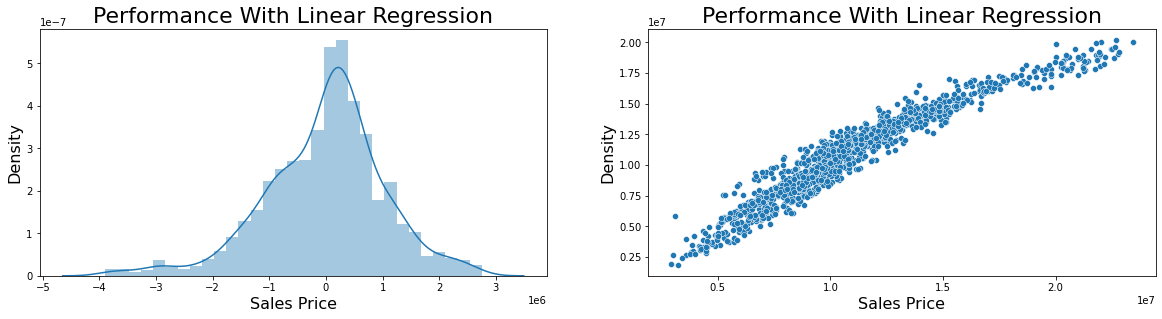

In [114]:
# visualize the performance of our model
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
sns.distplot(y_pred-y_test)
plt.title('Performance With Linear Regression',fontsize = 22)
plt.xlabel('Sales Price',fontsize = 16)
plt.ylabel('Density',fontsize = 16)


plt.subplot(2,2,2)
sns.scatterplot(y_test,y_pred)
plt.title('Performance With Linear Regression',fontsize = 22)
plt.xlabel('Sales Price',fontsize = 16)
plt.ylabel('Density',fontsize = 16)

plt.show()

# KNN Regression

In [115]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
alpha = [1,2,3,4,5,6,7,8,9,10,20]
for i in alpha:
    knn = KNeighborsRegressor(i)
    knn.fit(X_train,y_train)
    trainAccuracy = r2_score(y_train, knn.predict(X_train))
    print("K Value : " , i,"Train accuracy :",trainAccuracy, " cross val score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10)))

K Value :  1 Train accuracy : 1.0  cross val score :  0.9111005290744669
K Value :  2 Train accuracy : 0.9785946221235294  cross val score :  0.9294602445523348
K Value :  3 Train accuracy : 0.9707462775684987  cross val score :  0.93543747150801
K Value :  4 Train accuracy : 0.9650228844984757  cross val score :  0.9378138720058045
K Value :  5 Train accuracy : 0.9607470638621631  cross val score :  0.9390138511595396
K Value :  6 Train accuracy : 0.9586777169647146  cross val score :  0.9379212955811133
K Value :  7 Train accuracy : 0.9559140849015623  cross val score :  0.936818806357171
K Value :  8 Train accuracy : 0.9533067759276861  cross val score :  0.9344812380117571
K Value :  9 Train accuracy : 0.9505865328121235  cross val score :  0.9337567877685886
K Value :  10 Train accuracy : 0.948777947086475  cross val score :  0.9321528556726483
K Value :  20 Train accuracy : 0.9300148900912129  cross val score :  0.9172018314040313


In [116]:
# for k value = 10, we get best cross val score
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
knn_r2_score = r2_score(y_test,y_pred)
print('R2 Score For KNN:', knn_r2_score)

R2 Score For KNN: 0.9297430620582391


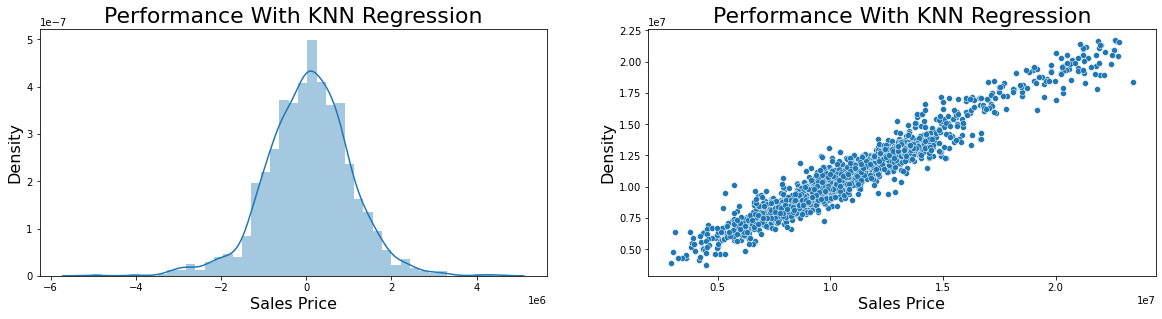

In [117]:
# visualize the performance of our model
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
sns.distplot(y_pred-y_test)
plt.title('Performance With KNN Regression',fontsize = 22)
plt.xlabel('Sales Price',fontsize = 16)
plt.ylabel('Density',fontsize = 16)


plt.subplot(2,2,2)
sns.scatterplot(y_test,y_pred)
plt.title('Performance With KNN Regression',fontsize = 22)
plt.xlabel('Sales Price',fontsize = 16)
plt.ylabel('Density',fontsize = 16)

plt.show()

# Decision Tree Regression

In [118]:
from sklearn.tree import DecisionTreeRegressor
depth = [1,2,3,4,5,6,7,8,9,10,20]
for i in depth:
    dtr = DecisionTreeRegressor(max_depth=i)
    dtr.fit(X_train,y_train)
    trainAccuracy = r2_score(y_train, dtr.predict(X_train))
    print("Depth : " , i,"Train accuracy :",trainAccuracy, " cross val score : ", np.mean(cross_val_score(dtr, X_train, y_train, cv=10)))

Depth :  1 Train accuracy : 0.367483923345051  cross val score :  0.36455256118825347
Depth :  2 Train accuracy : 0.5156691480503598  cross val score :  0.5131132410929895
Depth :  3 Train accuracy : 0.7010467469189448  cross val score :  0.6982930671824881
Depth :  4 Train accuracy : 0.8324882611282035  cross val score :  0.8291999639958505
Depth :  5 Train accuracy : 0.9062335636727323  cross val score :  0.8998920940630339
Depth :  6 Train accuracy : 0.934173816228436  cross val score :  0.9256522581434581
Depth :  7 Train accuracy : 0.9541603811139074  cross val score :  0.9432531984882246
Depth :  8 Train accuracy : 0.9689379850025143  cross val score :  0.9551104679422913
Depth :  9 Train accuracy : 0.9807472525868591  cross val score :  0.9623692533706615
Depth :  10 Train accuracy : 0.9891258054775266  cross val score :  0.9665260444534619
Depth :  20 Train accuracy : 0.999999586494607  cross val score :  0.9675714520884116


In [119]:
# for depth = 8, we get best cross val score
dtr = DecisionTreeRegressor(max_depth=8)
dtr.fit(X_train,y_train)
y_pred = dtr.predict(X_test)
dt_r2_score = r2_score(y_test,y_pred)
print('R2 Score For Decirion Tree Regressor:', dt_r2_score)

R2 Score For Decirion Tree Regressor: 0.9517342180391076


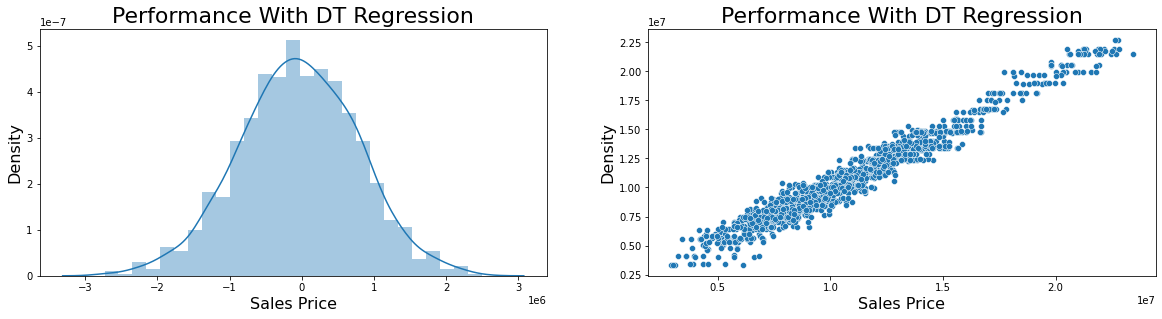

In [120]:
# visualize the performance of our model
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
sns.distplot(y_pred-y_test)
plt.title('Performance With DT Regression',fontsize = 22)
plt.xlabel('Sales Price',fontsize = 16)
plt.ylabel('Density',fontsize = 16)


plt.subplot(2,2,2)
sns.scatterplot(y_test,y_pred)
plt.title('Performance With DT Regression',fontsize = 22)
plt.xlabel('Sales Price',fontsize = 16)
plt.ylabel('Density',fontsize = 16)

plt.show()

# Random Forest Regression

In [121]:
from sklearn.ensemble import RandomForestRegressor
depth = [1,2,3,4,5,6,7,8,9,10,20]
for i in depth:
    rfr= RandomForestRegressor(max_depth=i,n_estimators=100,max_features="sqrt")
    rfr.fit(X_train,y_train)
    trainAccuracy = r2_score(y_train, rfr.predict(X_train))
    print("Depth : " , i,"Train accuracy :",trainAccuracy, " cross val score : ", np.mean(cross_val_score(rfr, X_train, y_train, cv=10)))

Depth :  1 Train accuracy : 0.35248486804213086  cross val score :  0.34153834663295723
Depth :  2 Train accuracy : 0.5273714034569184  cross val score :  0.5253328050335615
Depth :  3 Train accuracy : 0.6642164495831321  cross val score :  0.6481369962480853
Depth :  4 Train accuracy : 0.7615074615757246  cross val score :  0.7405698229882353
Depth :  5 Train accuracy : 0.8209972762476809  cross val score :  0.8138473806383668
Depth :  6 Train accuracy : 0.8670870736610903  cross val score :  0.8656511134962086
Depth :  7 Train accuracy : 0.905637868769727  cross val score :  0.9063974054644026
Depth :  8 Train accuracy : 0.9435871242632975  cross val score :  0.9284558250592374
Depth :  9 Train accuracy : 0.9607718277145424  cross val score :  0.9459393458758388
Depth :  10 Train accuracy : 0.9775919999818437  cross val score :  0.9568669233073855
Depth :  20 Train accuracy : 0.9964147654704031  cross val score :  0.9743678103887758


In [122]:
# for depth = 9, we get best cross val score
rfr = RandomForestRegressor(max_depth=9,n_estimators=100,max_features="sqrt")
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)
rf_r2_score = r2_score(y_test,y_pred)
print('R2 Score For Random Forest Regressor:',rf_r2_score )

R2 Score For Random Forest Regressor: 0.9379441246845347


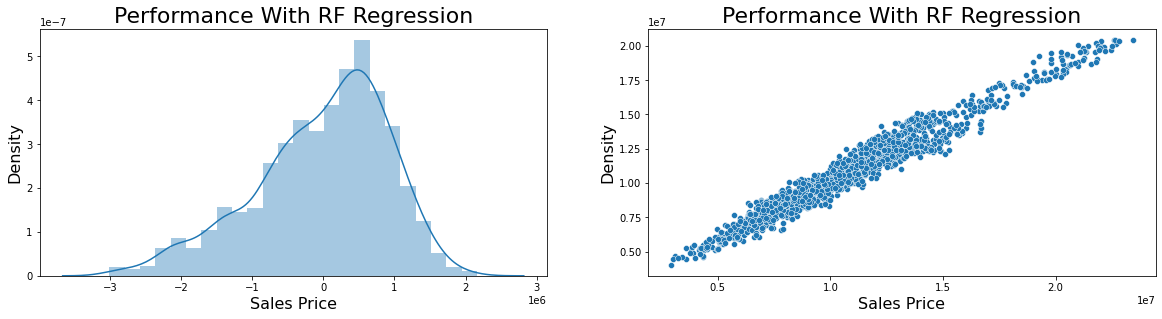

In [123]:
# visualize the performance of our model
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
sns.distplot(y_pred-y_test)
plt.title('Performance With RF Regression',fontsize = 22)
plt.xlabel('Sales Price',fontsize = 16)
plt.ylabel('Density',fontsize = 16)


plt.subplot(2,2,2)
sns.scatterplot(y_test,y_pred)
plt.title('Performance With RF Regression',fontsize = 22)
plt.xlabel('Sales Price',fontsize = 16)
plt.ylabel('Density',fontsize = 16)

plt.show()

# XG Boost Regression

In [124]:
from xgboost import XGBRegressor
learning = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.9,0.5,1]
for i in learning:
    xgb = XGBRegressor(learning_rate=i,n_estimators=100,verbosity = 0)
    xgb.fit(X_train,y_train)
    trainAccuracy = r2_score(y_train, xgb.predict(X_train))
    print("Learning Rate : " , i,"Train accuracy :",trainAccuracy, " cross val score : ", np.mean(cross_val_score(xgb, X_train, y_train, cv=10)))

Learning Rate :  0.01 Train accuracy : -0.3185134824073659  cross val score :  -0.3324020718747292
Learning Rate :  0.02 Train accuracy : 0.8007913707558986  cross val score :  0.7923825242321539
Learning Rate :  0.03 Train accuracy : 0.9621644701306814  cross val score :  0.9563235789928497
Learning Rate :  0.04 Train accuracy : 0.9886705076327734  cross val score :  0.9839421180859074
Learning Rate :  0.05 Train accuracy : 0.994487421886466  cross val score :  0.9905606476996599
Learning Rate :  0.06 Train accuracy : 0.9964345204217436  cross val score :  0.9929773652761694
Learning Rate :  0.07 Train accuracy : 0.9974397548680196  cross val score :  0.9943541178611046
Learning Rate :  0.08 Train accuracy : 0.9981231768807128  cross val score :  0.9952175961057452
Learning Rate :  0.09 Train accuracy : 0.9983910567768102  cross val score :  0.9956812352096852
Learning Rate :  0.1 Train accuracy : 0.9986727613627452  cross val score :  0.9960944372862774
Learning Rate :  0.9 Train acc

In [125]:
# for learning rate = 0.1, we get best cross val score
xgb = XGBRegressor(learning_rate = 0.1, n_estimators = 100)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
xgb_r2_score = r2_score(y_test,y_pred)
print('R2 Score For XG Boost:', xgb_r2_score)

R2 Score For XG Boost: 0.9962908650617973


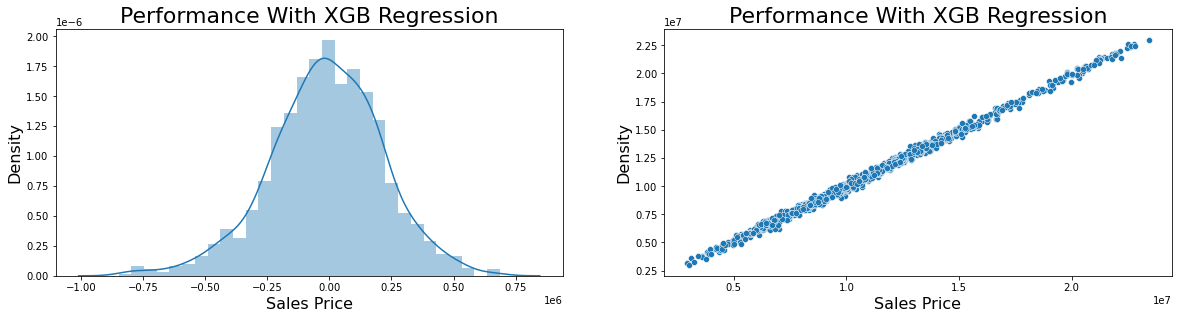

In [126]:
# visualize the performance of our model
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
sns.distplot(y_pred-y_test)
plt.title('Performance With XGB Regression',fontsize = 22)
plt.xlabel('Sales Price',fontsize = 16)
plt.ylabel('Density',fontsize = 16)


plt.subplot(2,2,2)
sns.scatterplot(y_test,y_pred)
plt.title('Performance With XGB Regression',fontsize = 22)
plt.xlabel('Sales Price',fontsize = 16)
plt.ylabel('Density',fontsize = 16)

plt.show()

In [127]:
r2_scores = pd.DataFrame({"Models":["Linear regression","KNN","Decision Tree","Random Forest","XGboost"],
                       "R2_Scores":[lr_r2_score,knn_r2_score,dt_r2_score,rf_r2_score,xgb_r2_score]})

In [128]:
r2_scores.sort_values(["R2_Scores"],ascending=False)

,Models,R2_Scores
4,XGboost,0.996291
2,Decision Tree,0.951734
3,Random Forest,0.937944
1,KNN,0.929743
0,Linear regression,0.921262


**We Can See That The XG Boost Gives Us The Best R2 Score**

# **Important Features By XG Boost**

In [129]:
imp_features = pd.DataFrame({'Importance' : xgb.feature_importances_},index = X.columns)
imp_features.Importance.sort_values(ascending=False) 

AREA                0.310095
BUILDTYPE_Others    0.274565
N_ROOM              0.173379
BUILDTYPE_House     0.132600
MZZONE              0.032790
INT_SQFT            0.032243
PARK_FACIL          0.016453
STREET              0.010457
N_BEDROOM           0.005570
N_BATHROOM          0.005139
SALE_COND           0.003171
HOUSE_AGE           0.002016
UTILITY_AVAIL       0.001360
DIST_MAINROAD       0.000162
Name: Importance, dtype: float32

# Model Build With Important Features

In [130]:
new_df = df3[['INT_SQFT','MZZONE', 'N_ROOM','AREA','PARK_FACIL', 'STREET','BUILDTYPE_Others','BUILDTYPE_House','SALES_PRICE']]
new_df.head()

,INT_SQFT,MZZONE,N_ROOM,AREA,PARK_FACIL,STREET,BUILDTYPE_Others,BUILDTYPE_House,SALES_PRICE
0,1004,1,3,1,2,2,0,0,7600000
1,1986,4,5,6,1,3,0,0,21717770
2,909,5,3,2,2,3,0,0,13159200
3,1855,3,5,4,1,2,1,0,9630290
4,1226,2,3,1,2,3,1,0,7406250


In [131]:
# split features and target data
X = new_df.drop(['SALES_PRICE'], axis = 1)
y = new_df['SALES_PRICE']

In [132]:
# split test and train data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Data Scaling

In [133]:
# import standard scaler for scaling data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Linear Regression

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [135]:
print('Best Intercept:\n',lr.intercept_,'\n')
print('Best Coefficient:\n',lr.coef_)

Best Intercept:
 10887834.932671864 

Best Coefficient:
 [  398404.38953172   877118.48106479   716442.32232386  1512600.54318216
   529018.09877065   347317.05713788 -1870609.17252387 -2226176.22158089]


In [136]:
y_pred = lr.predict(X_test)
lr_r2_score = r2_score(y_test,y_pred)
print('R2 Score For Linear Regression:', lr_r2_score)

R2 Score For Linear Regression: 0.8937873414186736


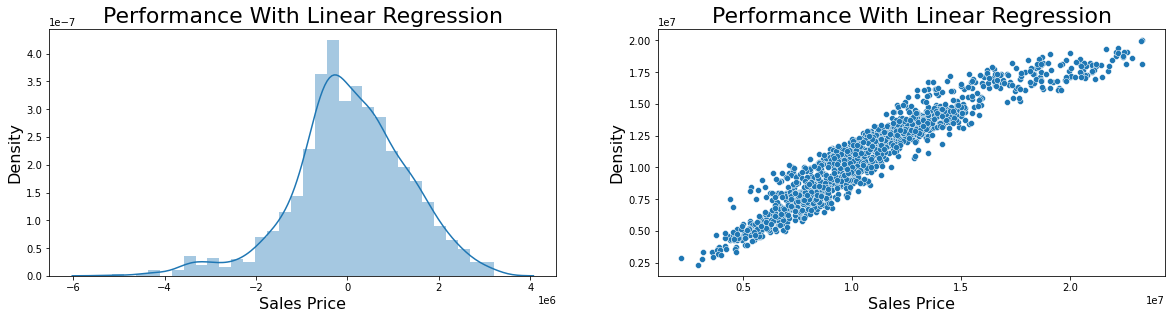

In [137]:
# visualize the performance of our model
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
sns.distplot(y_pred-y_test)
plt.title('Performance With Linear Regression',fontsize = 22)
plt.xlabel('Sales Price',fontsize = 16)
plt.ylabel('Density',fontsize = 16)


plt.subplot(2,2,2)
sns.scatterplot(y_test,y_pred)
plt.title('Performance With Linear Regression',fontsize = 22)
plt.xlabel('Sales Price',fontsize = 16)
plt.ylabel('Density',fontsize = 16)

plt.show()

# KNN Regression Algorithm

In [138]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
alpha = [1,2,3,4,5,6,7,8,9,10,20,25,30]
for i in alpha:
    knn = KNeighborsRegressor(i)
    knn.fit(X_train,y_train)
    trainAccuracy = r2_score(y_train, knn.predict(X_train))
    print("K Value : " , i,"Train accuracy :",trainAccuracy, " cross val score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10)))

K Value :  1 Train accuracy : 0.9998062569149517  cross val score :  0.9728724645926572
K Value :  2 Train accuracy : 0.9935278241002667  cross val score :  0.9735288968694367
K Value :  3 Train accuracy : 0.9890014100566984  cross val score :  0.970609071190011
K Value :  4 Train accuracy : 0.9847170213534189  cross val score :  0.9685953298384673
K Value :  5 Train accuracy : 0.9814119085469658  cross val score :  0.9667933172102858
K Value :  6 Train accuracy : 0.9783736533155892  cross val score :  0.9652691514089563
K Value :  7 Train accuracy : 0.9759819055905397  cross val score :  0.9636771964290544
K Value :  8 Train accuracy : 0.9738204410330635  cross val score :  0.9620008063155934
K Value :  9 Train accuracy : 0.9718763413185044  cross val score :  0.9598716225240851
K Value :  10 Train accuracy : 0.9693981608520776  cross val score :  0.9575398469819358
K Value :  20 Train accuracy : 0.9535447672297493  cross val score :  0.9443728961967557
K Value :  25 Train accuracy : 

In [139]:
# for k value = 6, we get best cross val score
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
knn_r2_score = r2_score(y_test,y_pred)
print('R2 Score For KNN:', knn_r2_score)

R2 Score For KNN: 0.967440683533516


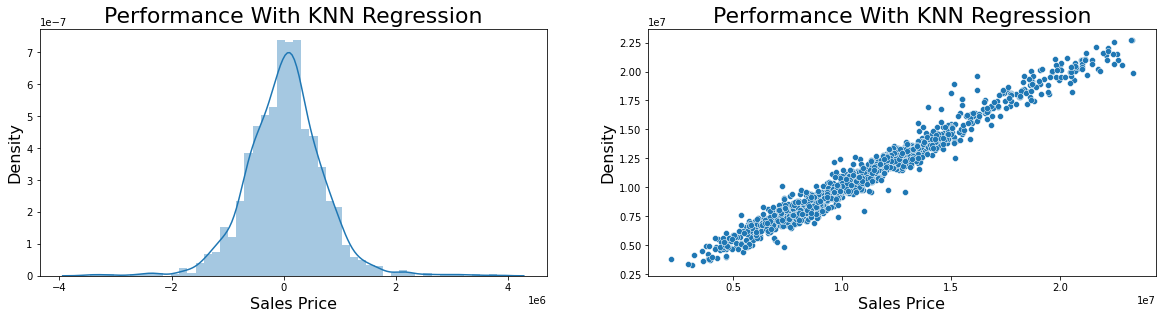

In [140]:
# visualize the performance of our model
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
sns.distplot(y_pred-y_test)
plt.title('Performance With KNN Regression',fontsize = 22)
plt.xlabel('Sales Price',fontsize = 16)
plt.ylabel('Density',fontsize = 16)


plt.subplot(2,2,2)
sns.scatterplot(y_test,y_pred)
plt.title('Performance With KNN Regression',fontsize = 22)
plt.xlabel('Sales Price',fontsize = 16)
plt.ylabel('Density',fontsize = 16)

plt.show()

# Decision Tree Regression

In [141]:
from sklearn.tree import DecisionTreeRegressor
depth = [1,2,3,4,5,6,7,8,9,10,20]
for i in depth:
    dtr = DecisionTreeRegressor(max_depth=i)
    dtr.fit(X_train,y_train)
    trainAccuracy = r2_score(y_train, dtr.predict(X_train))
    print("Depth : " , i,"Train accuracy :",trainAccuracy, " cross val score : ", np.mean(cross_val_score(dtr, X_train, y_train, cv=10)))

Depth :  1 Train accuracy : 0.3592354930203864  cross val score :  0.3567323302975606
Depth :  2 Train accuracy : 0.5092879360640103  cross val score :  0.5066523351585975
Depth :  3 Train accuracy : 0.6991554188486253  cross val score :  0.6954682081905493
Depth :  4 Train accuracy : 0.8302846243974934  cross val score :  0.8255293840515637
Depth :  5 Train accuracy : 0.9061571405287531  cross val score :  0.8991817513275369
Depth :  6 Train accuracy : 0.9336013197242308  cross val score :  0.9254254922655644
Depth :  7 Train accuracy : 0.9535800442114094  cross val score :  0.9442373334055567
Depth :  8 Train accuracy : 0.9679932598759557  cross val score :  0.9563828762460563
Depth :  9 Train accuracy : 0.9790034102443153  cross val score :  0.9655199042450155
Depth :  10 Train accuracy : 0.9870288915167547  cross val score :  0.9711124569566885
Depth :  20 Train accuracy : 0.9999001228093365  cross val score :  0.9739004650527457


In [142]:
# for depth = 10, we get best cross val score
dtr = DecisionTreeRegressor(max_depth=10)
dtr.fit(X_train,y_train)
y_pred = dtr.predict(X_test)
dt_r2_score = r2_score(y_test,y_pred)
print('R2 Score For Decirion Tree Regressor:', dt_r2_score)

R2 Score For Decirion Tree Regressor: 0.9729800253636937


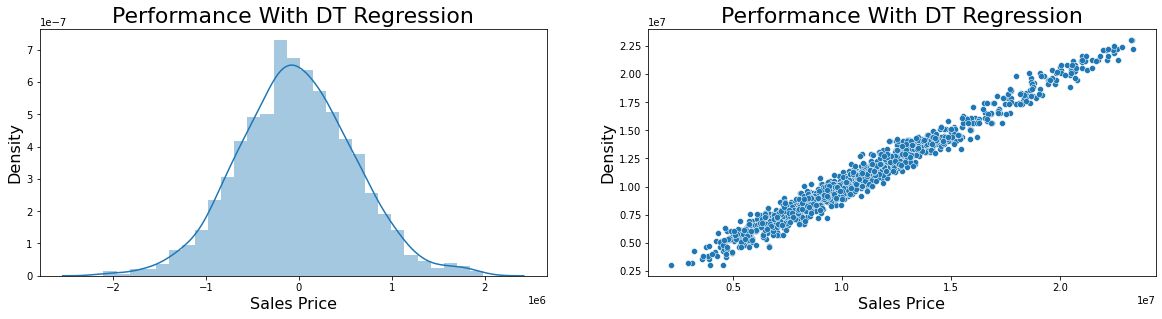

In [143]:
# visualize the performance of our model
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
sns.distplot(y_pred-y_test)
plt.title('Performance With DT Regression',fontsize = 22)
plt.xlabel('Sales Price',fontsize = 16)
plt.ylabel('Density',fontsize = 16)


plt.subplot(2,2,2)
sns.scatterplot(y_test,y_pred)
plt.title('Performance With DT Regression',fontsize = 22)
plt.xlabel('Sales Price',fontsize = 16)
plt.ylabel('Density',fontsize = 16)

plt.show()

# Random Forest Regression

In [147]:
from sklearn.ensemble import RandomForestRegressor
depth = [1,2,3,4,5,6,7,8,9,10,12,14,15,20]
for i in depth:
    rfr= RandomForestRegressor(max_depth=i,n_estimators=100,max_features="sqrt")
    rfr.fit(X_train,y_train)
    trainAccuracy = r2_score(y_train, rfr.predict(X_train))
    print("Depth : " , i,"Train accuracy :",trainAccuracy, " cross val score : ", np.mean(cross_val_score(rfr, X_train, y_train, cv=10)))

Depth :  1 Train accuracy : 0.36683863540184036  cross val score :  0.37482589747565065
Depth :  2 Train accuracy : 0.5639204569137042  cross val score :  0.5518775480233693
Depth :  3 Train accuracy : 0.6760496979703732  cross val score :  0.6811817583335023
Depth :  4 Train accuracy : 0.7721244228739566  cross val score :  0.7814457225209405
Depth :  5 Train accuracy : 0.8613790196376067  cross val score :  0.8488786089105632
Depth :  6 Train accuracy : 0.9057891438929103  cross val score :  0.8981002345856861
Depth :  7 Train accuracy : 0.9377362709466259  cross val score :  0.9304779373956894
Depth :  8 Train accuracy : 0.9625661528437733  cross val score :  0.9538860868220441
Depth :  9 Train accuracy : 0.9762742712643581  cross val score :  0.9689676406069797
Depth :  10 Train accuracy : 0.9855230637604594  cross val score :  0.9776560334279976
Depth :  12 Train accuracy : 0.9944399051086708  cross val score :  0.9840676999872547
Depth :  14 Train accuracy : 0.997088899641787  cr

In [149]:
# for depth = 15, we get best cross val score
rfr = RandomForestRegressor(max_depth=15,n_estimators=100,max_features="sqrt")
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)
rf_r2_score = r2_score(y_test,y_pred)
print('R2 Score For Random Forest Regressor:',rf_r2_score )

R2 Score For Random Forest Regressor: 0.9864008718189766


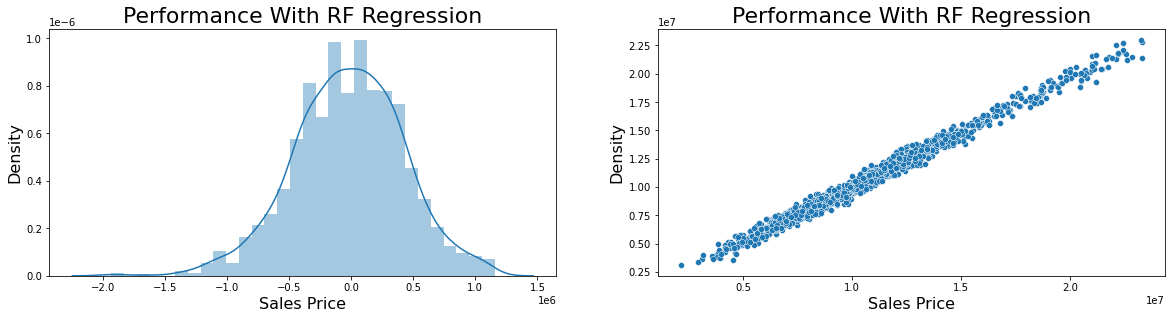

In [150]:
# visualize the performance of our model
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
sns.distplot(y_pred-y_test)
plt.title('Performance With RF Regression',fontsize = 22)
plt.xlabel('Sales Price',fontsize = 16)
plt.ylabel('Density',fontsize = 16)


plt.subplot(2,2,2)
sns.scatterplot(y_test,y_pred)
plt.title('Performance With RF Regression',fontsize = 22)
plt.xlabel('Sales Price',fontsize = 16)
plt.ylabel('Density',fontsize = 16)

plt.show()

# XG Boost Regression

In [151]:
from xgboost import XGBRegressor
learning = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.9,0.5,1]
for i in learning:
    xgb = XGBRegressor(learning_rate=i,n_estimators=100,verbosity = 0)
    xgb.fit(X_train,y_train)
    trainAccuracy = r2_score(y_train, xgb.predict(X_train))
    print("Learning Rate : " , i,"Train accuracy :",trainAccuracy, " cross val score : ", np.mean(cross_val_score(xgb, X_train, y_train, cv=10)))

Learning Rate :  0.01 Train accuracy : -0.32563068835845455  cross val score :  -0.3393021972128726
Learning Rate :  0.02 Train accuracy : 0.7995932680769238  cross val score :  0.7917095070026992
Learning Rate :  0.03 Train accuracy : 0.9603140850389745  cross val score :  0.9552632827221844
Learning Rate :  0.04 Train accuracy : 0.9854895916416452  cross val score :  0.9812823695138579
Learning Rate :  0.05 Train accuracy : 0.99074378324894  cross val score :  0.9867930989564371
Learning Rate :  0.06 Train accuracy : 0.9923109335492205  cross val score :  0.9884081641193483
Learning Rate :  0.07 Train accuracy : 0.9932021817148451  cross val score :  0.9892182488462634
Learning Rate :  0.08 Train accuracy : 0.993551103763055  cross val score :  0.9895040129455998
Learning Rate :  0.09 Train accuracy : 0.9939064397175057  cross val score :  0.9896805843012535
Learning Rate :  0.1 Train accuracy : 0.9940966872298448  cross val score :  0.9898189688040357
Learning Rate :  0.9 Train accu

In [153]:
# for learning rate = 0.1, we get best cross val score
xgb = XGBRegressor(learning_rate = 0.1, n_estimators = 100)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
xgb_r2_score = r2_score(y_test,y_pred)
print('R2 Score For XG Boost:', xgb_r2_score)

R2 Score For XG Boost: 0.9903675251081246


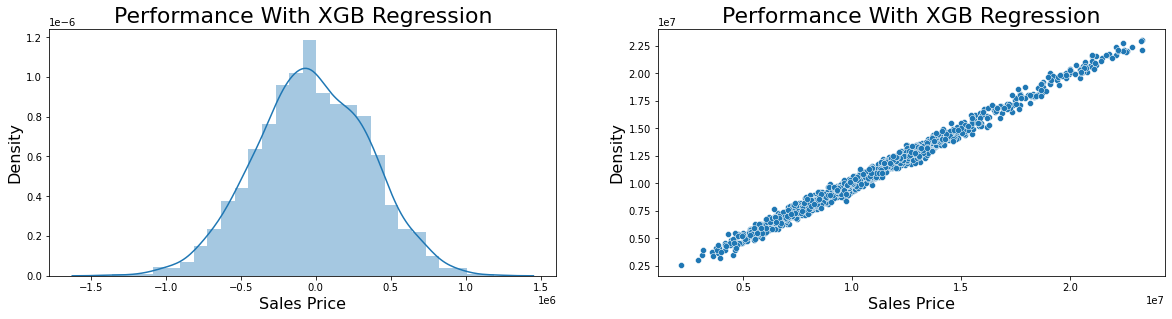

In [154]:
# visualize the performance of our model
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
sns.distplot(y_pred-y_test)
plt.title('Performance With XGB Regression',fontsize = 22)
plt.xlabel('Sales Price',fontsize = 16)
plt.ylabel('Density',fontsize = 16)


plt.subplot(2,2,2)
sns.scatterplot(y_test,y_pred)
plt.title('Performance With XGB Regression',fontsize = 22)
plt.xlabel('Sales Price',fontsize = 16)
plt.ylabel('Density',fontsize = 16)

plt.show()

In [155]:
new_r2_scores = pd.DataFrame({"Models":["Linear regression","KNN","Decision Tree","Random Forest","XGboost"],
                       "R2_Scores":[lr_r2_score,knn_r2_score,dt_r2_score,rf_r2_score,xgb_r2_score]})

In [156]:
new_r2_scores.sort_values(["R2_Scores"],ascending=False)

,Models,R2_Scores
4,XGboost,0.990368
3,Random Forest,0.986401
2,Decision Tree,0.972980
1,KNN,0.967441
0,Linear regression,0.893787


# **We Can See That The XG Boost Gives Us The Best R2 Score For Important Features, So We Can Consider This As Our Final Model**

**Thank You :)**